In [1]:
%run "sepkoskiMakerV6.ipynb"
#mpl.rcParams['figure.dpi']= 100

In [2]:
color_cyle = ["darkgreen", "lime", "navy", "royalblue", "darkorange", "gold"]

In [3]:
clade_of_interest = "Metazoa"
subclade_resolution = "genus"
superclade_resolutions = ["family", "order", "class"]
genus_age_cutoffs = {"family":5, "order":13, "class":25}
genus_age_cutoffs100Bins = {"family":10, "order":26, "class":50}
#genus_age_cutoffs = genus_age_cutoffs100Bins
genus_richness_cutoffs = {"family":5, "order":40, "class":200}
genus_richness_cutoffs100Bins = {"family":5, "order":40, "class":200}
#genus_richness_cutoffs = genus_richness_cutoffs100Bins

#super_age_cutoffs = {"family":2, "order":5, "class":13}
#super_richness_cutoffs = {"family":1, "order":2, "class":3}

# Options are terr, marine, carbonate, silicic, or None
env_type = "marine"

subset_name = clade_of_interest + "_" + env_type

In [4]:
subcladeDictMetazoa = getSubcladeOccurences(clade_of_interest, resolution=subclade_resolution, 
                                            environment_only=env_type)[subclade_resolution]
subcladeStartEnds = getSubcladeAgeRanges(subcladeDictMetazoa, min_occurence_threshold=1)

Local save of requested search found.

40150 unique subclades (['genus']) found
29253 subclades with multiple occurences
23346 subclades with multiple unique occurences
19292 subclades with at least 5 occurences


In [5]:
supercladeDicts = {}
for superclade in superclade_resolutions:
    print("Generating %s occurrences...\n"%(superclade))
    supercladeDictMetazoa = getSubcladeOccurences(clade_of_interest, resolution=superclade,
                                                  environment_only="marine")[superclade]
    supercladeDicts[superclade] = supercladeDictMetazoa
    print("Done.")

Generating family occurrences...

Local save of requested search found.

6511 unique subclades (['family']) found
5551 subclades with multiple occurences
4994 subclades with multiple unique occurences
4434 subclades with at least 5 occurences
Done.
Generating order occurrences...

Local save of requested search found.

955 unique subclades (['order']) found
871 subclades with multiple occurences
824 subclades with multiple unique occurences
754 subclades with at least 5 occurences
Done.
Generating class occurrences...

Local save of requested search found.

125 unique subclades (['class']) found
118 subclades with multiple occurences
114 subclades with multiple unique occurences
110 subclades with at least 5 occurences
Done.


In [6]:
cohorts = {}
for superclade in superclade_resolutions:
    print("Generating %s cohorts..."%(superclade))
    cohorts[superclade] = getSupercladeCohorts(clade_of_interest, superclade_resolution=superclade, 
                                  subclade_resoltion=subclade_resolution, environment_only=env_type)
    print("Done.\n")

Generating family cohorts...
Local save of requested search found.

Done.

Generating order cohorts...
Local save of requested search found.

Done.

Generating class cohorts...
Local save of requested search found.

Done.



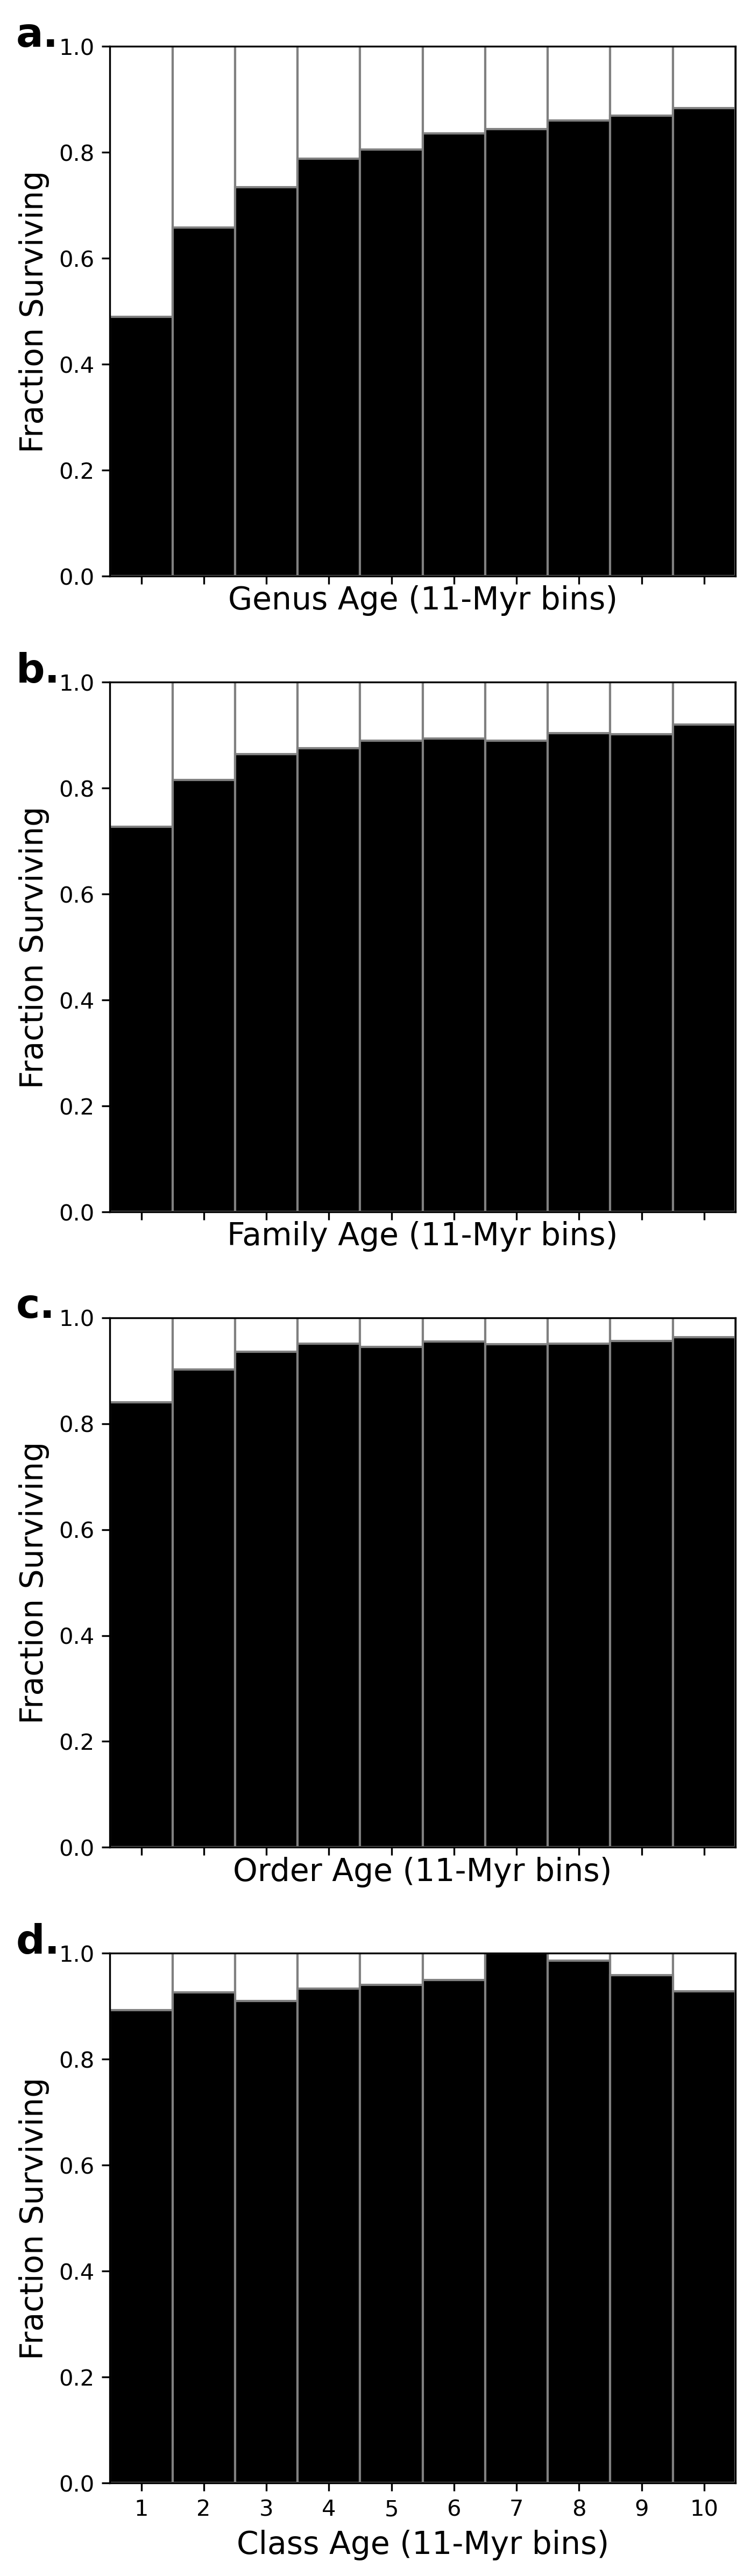

In [11]:
max_age = 10
fig, ax = plt.subplots(len(superclade_resolutions) + 1, 1, sharex=True, sharey=True)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=max_age, integer=True))
fig.set_size_inches(5, 5 * (len(superclade_resolutions) + 1))
ax[0].set_ylim(0,1)
ax[0].set_xlim(0.5, max_age + 0.5)

subcladeDurationMatrix = getDurationMatrix(subcladeDictMetazoa, n_bins=50, t_0=550, max_duration=550, 
                                           min_occurrences=1, min_unique=False)
subcladeSurvDict, counts = getSurvivalsByAge(subcladeDurationMatrix, max_age=max_age)
supercladeSurvDicts = {}
for res in supercladeDicts:
    supercladeDurationMatrix = getDurationMatrix(supercladeDicts[res], n_bins=50, t_0=550, max_duration=550, 
                                                 min_occurrences=1, min_unique=False)
    supercladeSurvDicts[res], _ = getSurvivalsByAge(supercladeDurationMatrix, max_age=max_age)

pane = 0
ax[pane].bar(range(1, max_age + 1), [1]*max_age,color='white', edgecolor='gray', width=1)
ax[pane].bar(range(1, max_age + 1), list(subcladeSurvDict.values()), color='black', edgecolor='gray', width=1)
ax[pane].set_xlabel("%s Age (11-Myr bins)"%(subclade_resolution.capitalize()), fontsize=14)
ax[pane].set_ylabel("Fraction Surviving", fontsize=14)
ax[pane].text(-1, 1, "a.", weight='bold', fontsize=18)
for res in supercladeSurvDicts:
    pane += 1
    ax[pane].bar(range(1, max_age + 1), [1]*max_age,color='white', edgecolor='gray', width=1)
    ax[pane].bar(range(1, max_age + 1), list(supercladeSurvDicts[res].values()), color='black', edgecolor='gray', width=1)
    ax[pane].set_xlabel("%s Age (11-Myr bins)"%(res.capitalize()), fontsize=14)
    ax[pane].set_ylabel("Fraction Surviving", fontsize=14)
    ax[pane].text(-1, 1, "%s."%(chr(97+pane)), weight='bold', fontsize=18)

In [9]:
taxDicts = {}
for superclade in superclade_resolutions:
    taxDicts[superclade] = getTaxonomyDict(subclade_resolution, superclade, verbose=False)
if "order" in taxDicts:
    taxDictOrder = taxDicts["order"]
else:
    taxDictOrder = getTaxonomyDict(subclade_resolution, "order", verbose=False)
subcladeDictMetazoaValidOrder = {subclade:subcladeDictMetazoa[subclade] for subclade in subcladeDictMetazoa if subclade in taxDictOrder}
print("Of", len(subcladeDictMetazoa), pluralize_rank(subclade_resolution)+",", len(subcladeDictMetazoaValidOrder), "could be mapped to a valid taxonomic order.")

Of 40150 genera, 36256 could be mapped to a valid taxonomic order.


In [10]:
t_0 = 550
tail_length = 10
max_duration = 275

min_occurrences = 1
unique_occurrences = False
min_per_bin = 0
validOrder = True

# Keep bins_hierarchical at 50 for final figures (for now...)
bins_hierarchical = 50
min_occurrences_hierarchical = 1

bin_size_hierarchical = t_0 / bins_hierarchical
subcladeDict = subcladeDictMetazoaValidOrder if validOrder else subcladeDictMetazoa
bins_to_timeH = [(t_0 - (bin_size_hierarchical * x)) - (1 * bin_size_hierarchical) for x in range(bins_hierarchical)]

In [11]:
# Define a duration matrix at the smallest subclade level for reference
durationMatrixMetazoaHierarchical, labelsH = getDurationMatrix(subcladeDict, n_bins=bins_hierarchical, t_0=t_0, 
                                                              max_duration=max_duration, min_occurrences=min_occurrences_hierarchical,
                                                              return_labels=True)


survivalMatrixMetazoaHierarchical = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin)
speciationNumsH = get_speciation_rate(durationMatrixMetazoaHierarchical)
#_, countsH = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, proportions=False)
survivalCountsMetazoaH, ageByBinMetazoaH = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, proportions=False)
countsH = ageByBinMetazoaH

family:
38704 observations of genera in young superclades and 38823 in old superclades
checked: 82168 assigned to valid superclade: 77527 ratio: 0.9435181579203583
38782 observations of genera in young superclades and 45550 in old superclades
checked: 89213 assigned to valid superclade: 84332 ratio: 0.9452882427448914
38782 observations of genera in young superclades and 45550 in old superclades
checked: 89213 assigned to valid superclade: 84332 ratio: 0.9452882427448914
19734 observations of genera in young superclades and 17957 in old superclades
checked: 37691 assigned to valid superclade: 37691 ratio: 1.0
order:
42256 observations of genera in young superclades and 39907 in old superclades
checked: 82168 assigned to valid superclade: 82163 ratio: 0.9999391490604614
42817 observations of genera in young superclades and 46391 in old superclades
checked: 89213 assigned to valid superclade: 89208 ratio: 0.9999439543564279
42817 observations of genera in young superclades and 46391 in o

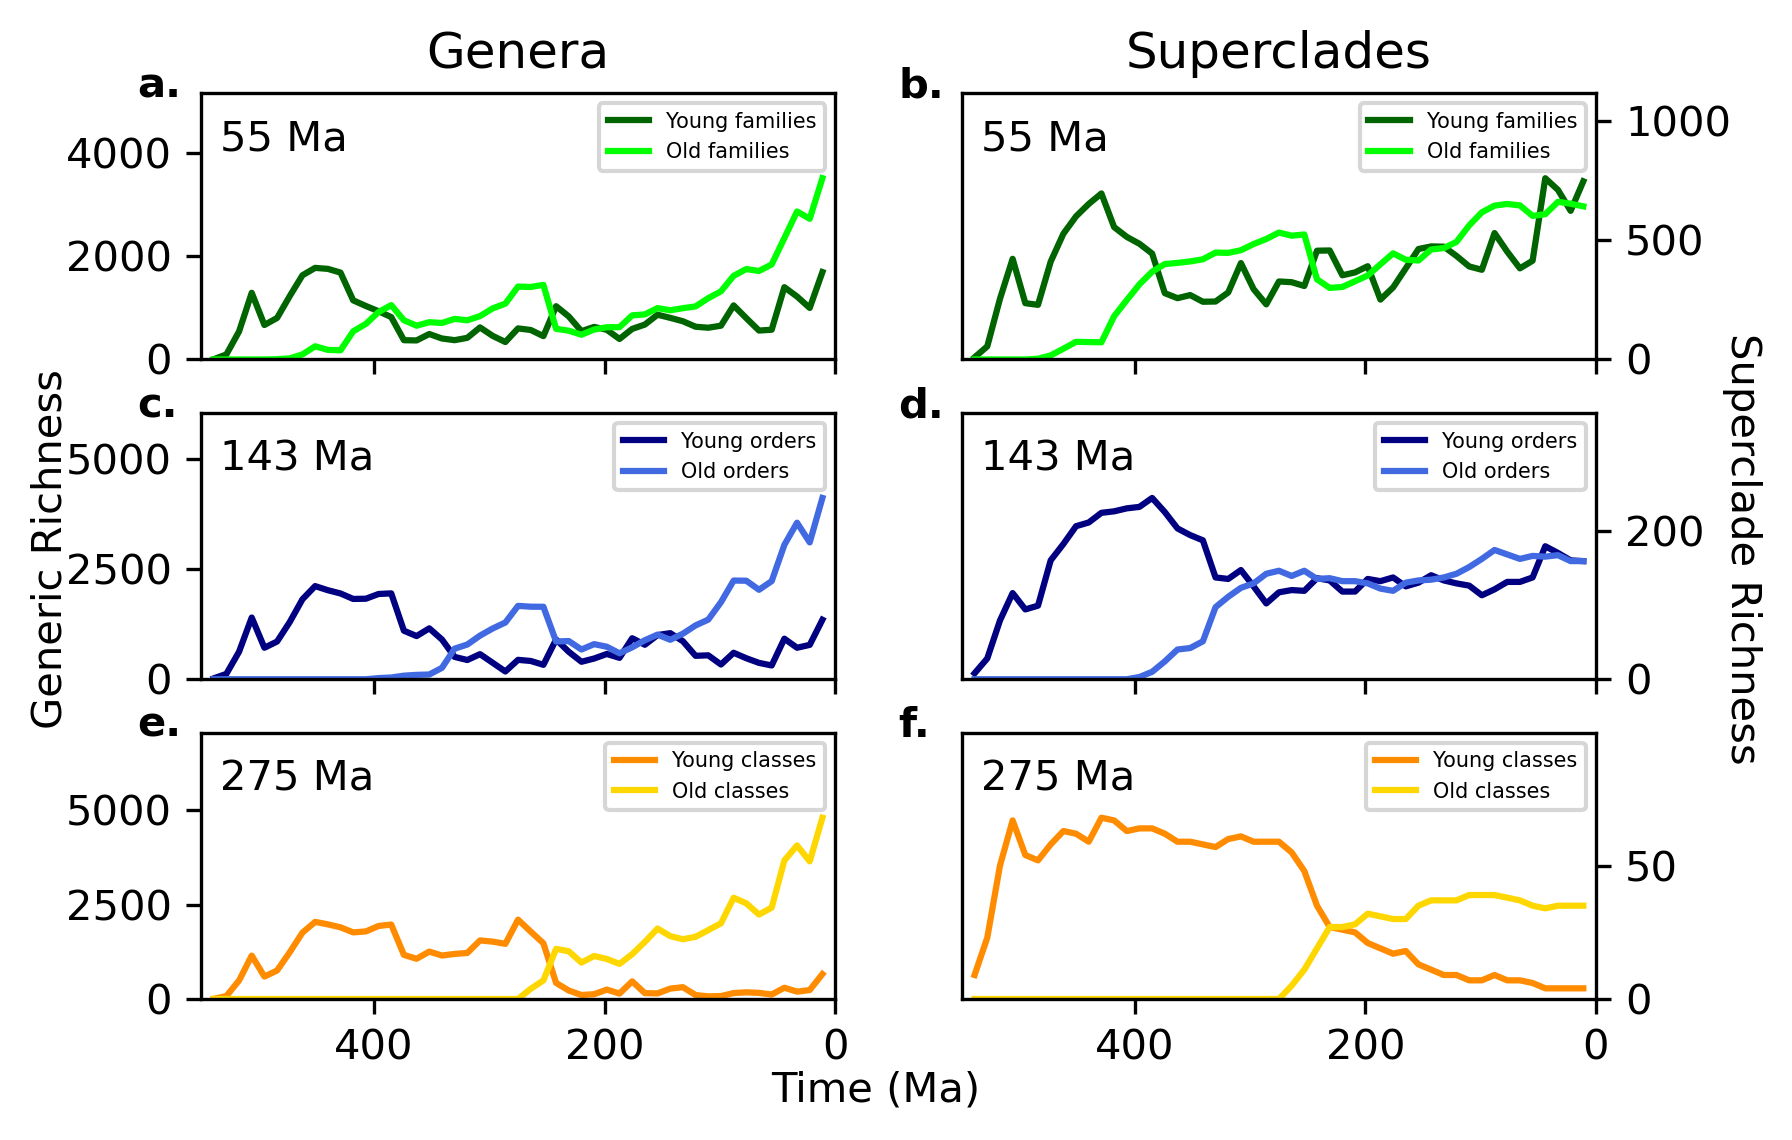

In [14]:
durationMatrices = {}
supercladeLabels = {}
survivalMatrices = {}

speciationNumbers = {}
extinctionNumbers = {}
countsByAgeSplit = {}

binnedCountsByAgeSplit = {}

superExtinctionDuration = {}
superCountsDuration = {}


# Calculate extinction, speciation in genera belonging to 
# old vs. young clades at each superclade level
for superclade in superclade_resolutions:
    print("%s:"%(superclade))
    supercladeDict = supercladeDicts[superclade]
    supercladeTaxDict = taxDicts[superclade]
    ageSplit = genus_age_cutoffs[superclade]
    durationMatrixSuper, durationLabelsSuper = getDurationMatrix(supercladeDict, n_bins=bins_hierarchical, t_0=t_0, 
                                                                 max_duration=700, min_occurrences=min_occurrences_hierarchical,
                                                                 return_labels=True)
    survivalMatricesDuration = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                         taxDict=supercladeTaxDict, supercladeDurationMatrix=durationMatrixSuper, 
                                         taxon_labels=labelsH, super_labels=durationLabelsSuper, young_cutoff=ageSplit, mid_cutoff=10^20)

    speciationDuration = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=bins_hierarchical, min_per_bin=min_per_bin, 
                                         taxDict=supercladeTaxDict, supercladeDurationMatrix=durationMatrixSuper, 
                                         taxon_labels=labelsH, super_labels=durationLabelsSuper, young_cutoff=ageSplit, 
                                         mid_cutoff=10^20, speciation=True)

    extinctionDuration, countsDuration = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=bins_hierarchical, min_per_bin=min_per_bin, 
                                          taxDict=supercladeTaxDict, supercladeDurationMatrix=durationMatrixSuper, 
                                          taxon_labels=labelsH, super_labels=durationLabelsSuper, young_cutoff=ageSplit, 
                                          mid_cutoff=10^20, proportions=False)
    
    self_to_self_dict = {x:x for x in durationLabelsSuper}
    extinctionSuperDuration, countsSuperDuration = getSurvivalMatrix(durationMatrixSuper, max_tail=bins_hierarchical, min_per_bin=min_per_bin, 
                                                                     taxDict=self_to_self_dict, supercladeDurationMatrix=durationMatrixSuper, 
                                                                     taxon_labels=durationLabelsSuper, super_labels=durationLabelsSuper, 
                                                                     young_cutoff=ageSplit, mid_cutoff=10^20, proportions=False)

    durationMatrices[superclade] = durationMatrixSuper
    supercladeLabels[superclade] = durationLabelsSuper
    survivalMatrices[superclade] = survivalMatricesDuration
    speciationNumbers[superclade] = speciationDuration
    extinctionNumbers[superclade] = [np.sum(x, axis=0) for x in extinctionDuration]
    countsByAgeSplit[superclade] = [np.array([sum(x) for x in y]) for y in countsDuration]
    binnedCountsByAgeSplit[superclade] =  [np.array([x[:tail_length] for x in y]) for y in countsDuration]
    
    superExtinctionDuration[superclade] = [np.sum(x, axis=0) for x in extinctionSuperDuration]
    superCountsDuration[superclade] = [np.array([sum(x) for x in y]) for y in countsSuperDuration]

fig, ax = plt.subplots(len(superclade_resolutions),2,sharex=True)
count = 0 
for superclade in countsByAgeSplit:
    ax[count//2, 0].plot(bins_to_timeH[:-1], countsByAgeSplit[superclade][0][:-1], 
                         label="Young %s"%(pluralize_rank(superclade)), color=color_cyle[count])
    ax[count//2, 0].plot(bins_to_timeH[:-1], countsByAgeSplit[superclade][1][:-1], 
                         label="Old %s"%(pluralize_rank(superclade)), color=color_cyle[count+1])
    
    ax[count//2, 1].plot(bins_to_timeH[:-1], superCountsDuration[superclade][0][:-1], 
                         label="Young %s"%(pluralize_rank(superclade)), color=color_cyle[count])
    ax[count//2, 1].plot(bins_to_timeH[:-1], superCountsDuration[superclade][1][:-1], 
                         label="Old %s"%(pluralize_rank(superclade)), color=color_cyle[count+1])

    ax[count//2, 1].yaxis.tick_right()

    count+=2

for x in ax.flatten(): x.set_xlim(t_0, 0)
for x in ax.flatten(): x.set_ylim(0, x.get_ylim()[1]*1.4)
count = 0 

for superclade in countsByAgeSplit:
    ax[count//2, 0].text(1.1*t_0,1.1*ax[count//2, 0].get_ylim()[1],
                         "%s."%(chr(97+count)), ha='left', va='top', weight="bold")
    ax[count//2, 0].text(0.97*t_0,0.9*ax[count//2, 0].get_ylim()[1],
                         "%i Ma"%(bin_size_hierarchical*genus_age_cutoffs[superclade]), ha='left', va='top')
    
    ax[count//2, 1].text(1.1*t_0,1.1*ax[count//2, 1].get_ylim()[1],
                         "%s."%(chr(97+count+1)), ha='left', va='top', weight="bold")
    ax[count//2, 1].text(0.97*t_0,0.9*ax[count//2, 1].get_ylim()[1],
                         "%i Ma"%(bin_size_hierarchical*genus_age_cutoffs[superclade]), ha='left', va='top')

    count+=2

ax[0, 0].set_title("Genera")
ax[0, 1].set_title("Superclades")

fig.text(0.5, 0.04, "Time (Ma)", ha='center')
fig.text(0.97, 0.5, "Superclade Richness", va='center', rotation=270)
fig.text(0.03, 0.5, "Generic Richness", va='center', rotation=90)
for x in ax.flatten(): x.legend(loc="upper right", fontsize=5)

family:
43412 observations of genera in poor superclades and  34115 in rich superclades
checked: 82168 assigned to valid superclade: 77527 ratio: 0.9435181579203583
47556 observations of genera in poor superclades and  36776 in rich superclades
checked: 89213 assigned to valid superclade: 84332 ratio: 0.9452882427448914
47556 observations of genera in poor superclades and  36776 in rich superclades
checked: 89213 assigned to valid superclade: 84332 ratio: 0.9452882427448914
33783 observations of genera in poor superclades and  3617 in rich superclades
checked: 37691 assigned to valid superclade: 37400 ratio: 0.9922793239765462
order:
42478 observations of genera in poor superclades and  39684 in rich superclades
checked: 82168 assigned to valid superclade: 82162 ratio: 0.9999269788725538
46816 observations of genera in poor superclades and  42391 in rich superclades
checked: 89213 assigned to valid superclade: 89207 ratio: 0.9999327452277135
46816 observations of genera in poor supercl

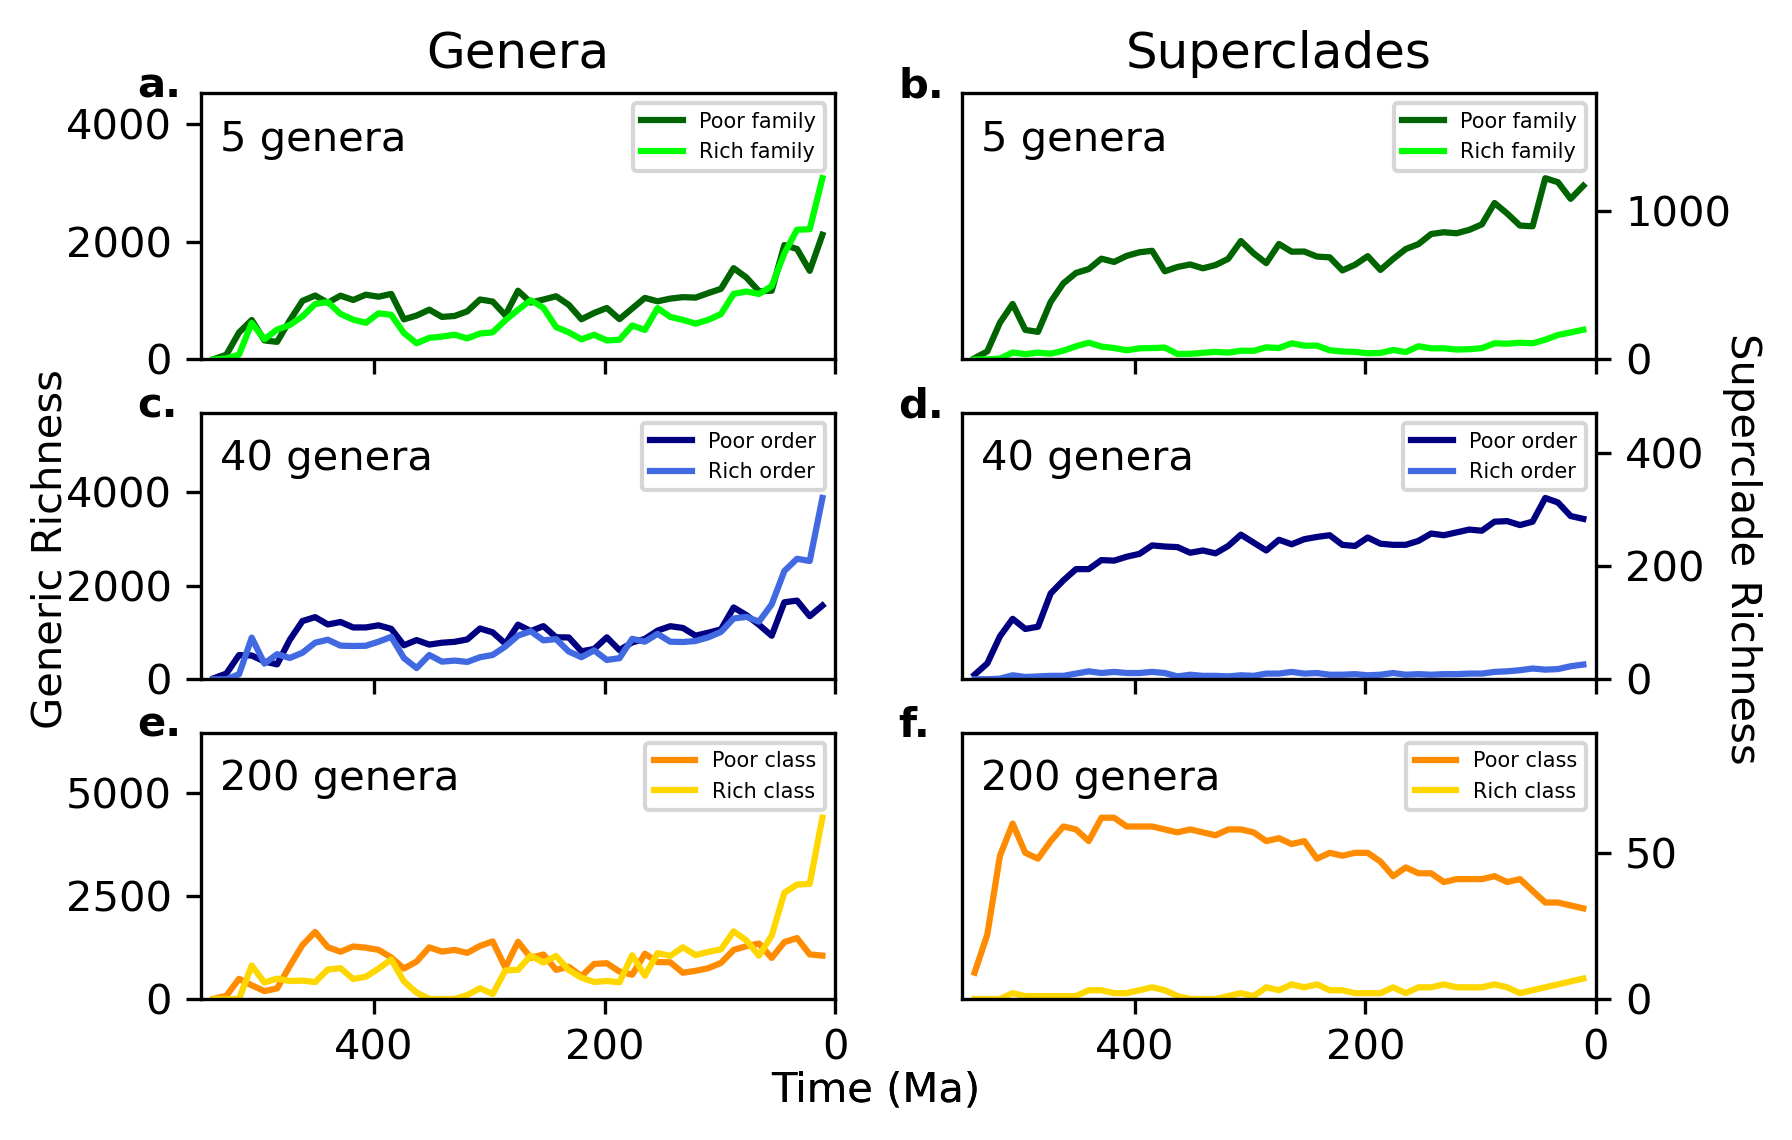

In [15]:
richnessMatrices = {}
richnessLabels = {}
survivalMatricesRichness = {}

speciationNumbersRichness = {}
extinctionNumbersRichness = {}
countsByRichnessSplit = {}

superExtinctionRichness = {}
superCountsRichness = {}

binnedCountsByRichnessSplit = {}

# Calculate extinction, speciation in genera belonging to 
# rich vs. poor clades at each superclade level
for superclade in superclade_resolutions:
    print("%s:"%(superclade))
    supercladeDict = supercladeDicts[superclade]
    supercladeTaxDict = taxDicts[superclade]
    durationMatrixSuper = durationMatrices[superclade]
    durationLabelsSuper = supercladeLabels[superclade]
    richnessSplit = genus_richness_cutoffs[superclade]
    #richnessSplitSuper = super_richness_cutoffs[superclade]
    
    richnessMatrixSuper, richnessLabelsSuper = getSuperCladeRichnessMatrix(cohorts[superclade], subcladeStartEnds, 
                                                                           n_bins=bins_hierarchical, t_0=t_0)
    
    survivalMatricesR = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                         taxDict=supercladeTaxDict, supercladeRichnessMatrix=richnessMatrixSuper, 
                                         taxon_labels=labelsH, super_labels=richnessLabelsSuper, young_cutoff=richnessSplit, 
                                         mid_cutoff=10^20, proportions=True)
    
    speciationRichness = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=bins_hierarchical, min_per_bin=min_per_bin, 
                                             taxDict=supercladeTaxDict, supercladeRichnessMatrix=richnessMatrixSuper, 
                                             taxon_labels=labelsH, super_labels=richnessLabelsSuper, young_cutoff=richnessSplit, 
                                             mid_cutoff=10^20, speciation=True)

    extinctionRichness, countsRichness = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=bins_hierarchical, min_per_bin=0, 
                                                 taxDict=supercladeTaxDict, supercladeRichnessMatrix=richnessMatrixSuper, 
                                                 taxon_labels=labelsH, super_labels=richnessLabelsSuper, young_cutoff=richnessSplit, 
                                                 mid_cutoff=10^20, proportions=False)
    
    self_to_self_dict = {x:x for x in richnessLabelsSuper+durationLabelsSuper}
    extinctionSuperRichness, countsSuperRichness = getSurvivalMatrix(durationMatrixSuper, max_tail=bins_hierarchical, min_per_bin=min_per_bin, 
                                                 taxDict=self_to_self_dict, supercladeRichnessMatrix=richnessMatrixSuper, 
                                                 taxon_labels=durationLabelsSuper, super_labels=richnessLabelsSuper, young_cutoff=richnessSplit, 
                                                 mid_cutoff=10^20, proportions=False)

    
    
    richnessMatrices[superclade] = richnessMatrixSuper
    richnessLabels[superclade] = richnessLabelsSuper
    survivalMatricesRichness[superclade] = survivalMatricesR
    
    speciationNumbersRichness[superclade] = speciationRichness
    extinctionNumbersRichness[superclade] = [np.sum(x, axis=0) for x in extinctionRichness]
    countsByRichnessSplit[superclade] = [np.array([sum(x) for x in y]) for y in countsRichness]
    binnedCountsByRichnessSplit[superclade] =  [np.array([x[:tail_length] for x in y]) for y in countsRichness]

    superExtinctionRichness[superclade] = [np.sum(x, axis=0) for x in extinctionSuperRichness]
    superCountsRichness[superclade] = [np.array([sum(x) for x in y]) for y in countsSuperRichness]

    
fig, ax = plt.subplots(len(superclade_resolutions),2,sharex=True)
count = 0 
for superclade in countsByRichnessSplit:
    ax[count//2, 0].plot(bins_to_timeH[:-1], countsByRichnessSplit[superclade][0][:-1], 
                        label="Poor %s"%(superclade), color=color_cyle[count])
    ax[count//2, 0].plot(bins_to_timeH[:-1], countsByRichnessSplit[superclade][1][:-1], 
                        label="Rich %s"%(superclade), color=color_cyle[count+1])
    
    ax[count//2, 1].plot(bins_to_timeH[:-1], superCountsRichness[superclade][0][:-1], 
                         label="Poor %s"%(superclade), color=color_cyle[count])
    ax[count//2, 1].plot(bins_to_timeH[:-1], superCountsRichness[superclade][1][:-1], 
                         label="Rich %s"%(superclade), color=color_cyle[count+1])

    ax[count//2, 1].yaxis.tick_right()

    count+=2

count = 0 

for x in ax.flatten(): x.set_xlim(t_0, 0)
for x in ax.flatten(): x.set_ylim(0, x.get_ylim()[1]*1.4)

for superclade in countsByRichnessSplit:
    ax[count//2, 0].text(1.1*t_0,1.1*ax[count//2, 0].get_ylim()[1],
                         "%s."%(chr(97+count)), ha='left', va='top', weight="bold")
    ax[count//2, 0].text(0.97*t_0,0.9*ax[count//2,0].get_ylim()[1],
                         "%i genera"%(genus_richness_cutoffs[superclade]), ha='left', va='top')
    
    ax[count//2, 1].text(1.1*t_0,1.1*ax[count//2, 1].get_ylim()[1],
                         "%s."%(chr(97+count+1)), ha='left', va='top', weight="bold")
    ax[count//2, 1].text(0.97*t_0,0.9*ax[count//2,1].get_ylim()[1],
                         "%i genera"%(genus_richness_cutoffs[superclade]), ha='left', va='top')
    count+=2


ax[0, 0].set_title("Genera")
ax[0, 1].set_title("Superclades")


fig.text(0.5, 0.04, "Time (Ma)", ha='center')

fig.text(0.5, 0.04, "Time (Ma)", ha='center')
fig.text(0.97, 0.5, "Superclade Richness", va='center', rotation=270)
fig.text(0.03, 0.5, "Generic Richness", va='center', rotation=90)
for x in ax.flatten(): x.legend(loc="upper right", fontsize=5)


In [16]:
persistenceByDuration = {}
persistenceByRichness = {}
aggregateLogOdds = {}

num_bootstraps = 0
num_taxaH = durationMatrixMetazoaHierarchical.shape[0]

for superclade in survivalMatrices:
    print("%s:"%(superclade))
    num_bins_regressed = False if (genus_age_cutoffs[superclade]>=tail_length) else genus_age_cutoffs[superclade]
    if not num_bins_regressed:
        print("regressing on data for all age bins")
    else:
        print("regressing on data for %i age bins"%(num_bins_regressed))

    logOddsH, modelsH, bsH = getLogOdds(survivalMatrixMetazoaHierarchical, 
                                        count_by_bin = countsH, limit_ages=num_bins_regressed,
                                        num_bootstraps=num_bootstraps)
    
    #print(binnedCountsByAgeSplit[superclade][0])
    logOdds_young, models_young, bs_young = getLogOdds(survivalMatrices[superclade][0], 
                                                       count_by_bin = binnedCountsByAgeSplit[superclade][0], 
                                                       limit_ages=num_bins_regressed, 
                                                       num_bootstraps=num_bootstraps)
    logOdds_old, models_old, bs_old = getLogOdds(survivalMatrices[superclade][1], 
                                                 count_by_bin = binnedCountsByAgeSplit[superclade][1], 
                                                 limit_ages=num_bins_regressed, 
                                                 num_bootstraps=num_bootstraps)
    
    logOdds_poor, models_poor, bs_poor = getLogOdds(survivalMatricesRichness[superclade][0], 
                                                    count_by_bin = binnedCountsByRichnessSplit[superclade][0], 
                                                    limit_ages=num_bins_regressed, 
                                                    num_bootstraps=num_bootstraps)
    logOdds_rich, models_rich, bs_rich = getLogOdds(survivalMatricesRichness[superclade][1], 
                                                    count_by_bin = binnedCountsByRichnessSplit[superclade][1], 
                                                    limit_ages=num_bins_regressed, 
                                                    num_bootstraps=num_bootstraps)
    persistenceByDuration[superclade] = [(np.log(logOdds_young), models_young, bs_young), 
                                         (np.log(logOdds_old), models_old, bs_old)]
    persistenceByRichness[superclade] = [(np.log(logOdds_poor), models_poor, bs_poor),
                                         (np.log(logOdds_rich), models_rich, bs_rich)]
    aggregateLogOdds[superclade] = np.log(logOddsH)

family:
regressing on data for 5 age bins
order:
regressing on data for all age bins
class:
regressing on data for all age bins


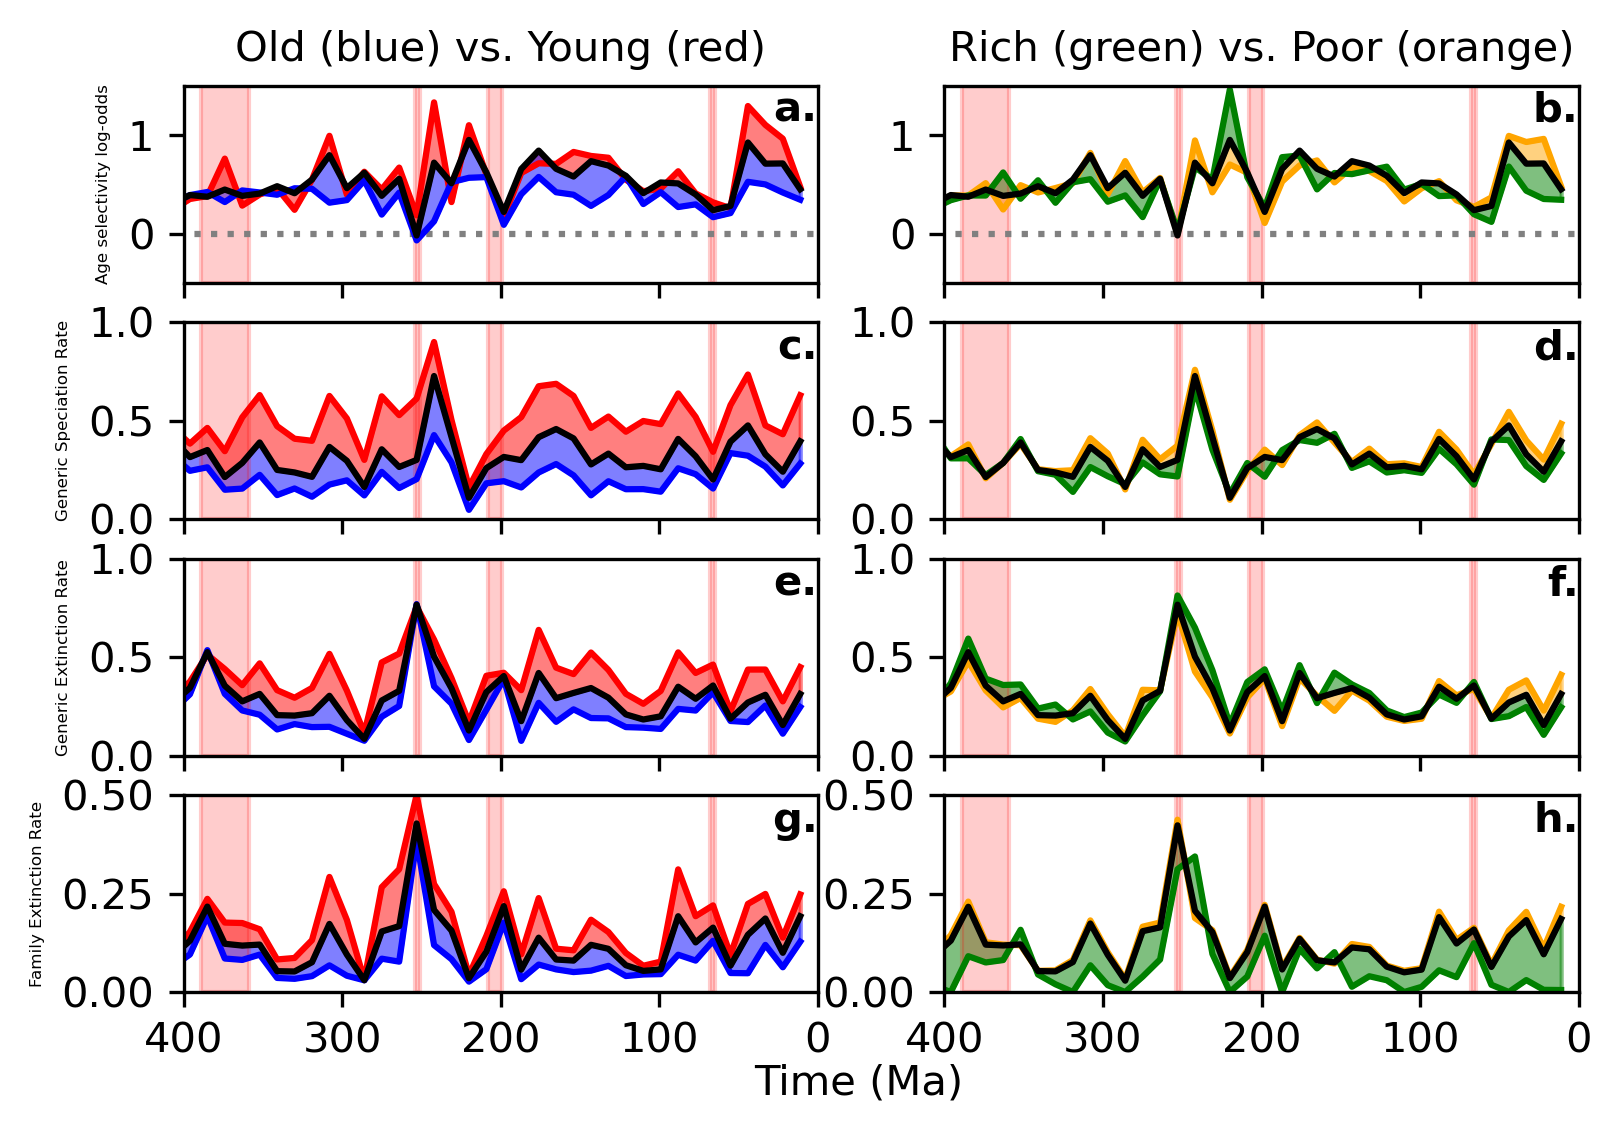

In [43]:
resolution_to_plot = "family"

#Formatting
fig, ax = plt.subplots(4, 2, sharex=True)
for x in ax.flatten(): x.set_xlim(400,0)

ax[0,0].set_title("Old (blue) vs. Young (red)", fontsize=10)
ax[0,1].set_title("Rich (green) vs. Poor (orange)", fontsize=10)
#fig.text(0.5, 0.96, resolution_to_plot.title(), ha='center')
fig.text(0.5, 0.04, "Time (Ma)", ha='center')

for x in ax.flatten():
    x.axvspan(448, 443, alpha=0.2, color='red')
    x.axvspan(389, 359, alpha=0.2, color='red')
    x.axvspan(254, 251, alpha=0.2, color='red')
    x.axvspan(208, 199, alpha=0.2, color='red')
    x.axvspan(68, 65, alpha=0.2, color='red')

genusCountsPerTimeBinYoung, genusCountsPerTimeBinOld = (countsByAgeSplit[resolution_to_plot][0], 
                                                        countsByAgeSplit[resolution_to_plot][1])
genusCountsPerTimeBinPoor, genusCountsPerTimeBinRich = (countsByRichnessSplit[resolution_to_plot][0], 
                                                        countsByRichnessSplit[resolution_to_plot][1])
genusCountsPerTimeBinAllAge = genusCountsPerTimeBinYoung + genusCountsPerTimeBinOld
genusCountsPerTimeBinAllRich = genusCountsPerTimeBinPoor + genusCountsPerTimeBinRich

superCountsPerTimeBinYoung, superCountsPerTimeBinOld = (superCountsDuration[resolution_to_plot][0], 
                                                        superCountsDuration[resolution_to_plot][1])
superCountsPerTimeBinPoor, superCountsPerTimeBinRich = (superCountsRichness[resolution_to_plot][0], 
                                                        superCountsRichness[resolution_to_plot][1])
superCountsPerTimeBinAllRich = superCountsPerTimeBinPoor + superCountsPerTimeBinRich
superCountsPerTimeBinAllAge = superCountsPerTimeBinYoung + superCountsPerTimeBinOld

counts = [genusCountsPerTimeBinYoung, genusCountsPerTimeBinOld, genusCountsPerTimeBinPoor, 
          genusCountsPerTimeBinRich, genusCountsPerTimeBinAllRich, superCountsPerTimeBinYoung, 
          superCountsPerTimeBinOld, superCountsPerTimeBinPoor, superCountsPerTimeBinRich, 
          superCountsPerTimeBinAllAge, superCountsPerTimeBinAllRich, genusCountsPerTimeBinAllAge]
for x in counts:
    x[x==0] = 1

#plotting age-selectivity
ax[0, 0].set_ylabel("Age selectivity log-odds", fontsize=4)
for x in [ax[0, 0], ax[0, 1]]: x.set_ylim(-0.5, 1.5)
logOdds_young, logOdds_old = (persistenceByDuration[resolution_to_plot][0][0], 
                              persistenceByDuration[resolution_to_plot][1][0])
ax[0, 0].plot(bins_to_timeH, logOdds_young, 
              label="Young %s"%(resolution_to_plot), color="red")
ax[0, 0].plot(bins_to_timeH, logOdds_old, 
              label="Old %s"%(resolution_to_plot), color="blue")
ax[0, 0].plot(bins_to_timeH, aggregateLogOdds[resolution_to_plot], 
              label="All %s"%(resolution_to_plot), color="black")
ax[0, 0].hlines([0],t_0, 0, linestyle=":", color="gray")
ax[0, 0].fill_between(x=bins_to_timeH, y1=logOdds_young, y2=aggregateLogOdds[resolution_to_plot], color="red", alpha=0.5)
ax[0, 0].fill_between(x=bins_to_timeH, y1=logOdds_old, y2=aggregateLogOdds[resolution_to_plot], color="blue", alpha=0.5)

logOdds_poor, logOdds_rich = (persistenceByRichness[resolution_to_plot][0][0], 
                              persistenceByRichness[resolution_to_plot][1][0])
ax[0, 1].plot(bins_to_timeH, logOdds_poor, 
                 label="Poor %s"%(resolution_to_plot), color="orange")
ax[0, 1].plot(bins_to_timeH, logOdds_rich, 
                 label="Rich %s"%(resolution_to_plot), color="green")
ax[0, 1].plot(bins_to_timeH, aggregateLogOdds[resolution_to_plot], 
                 label="All %s"%(resolution_to_plot), color="black")
ax[0, 1].hlines([0],t_0, 0, linestyle=":", color="gray")
ax[0, 1].fill_between(x=bins_to_timeH, y1=logOdds_poor, y2=aggregateLogOdds[resolution_to_plot], color="orange", alpha=0.5)
ax[0, 1].fill_between(x=bins_to_timeH, y1=logOdds_rich, y2=aggregateLogOdds[resolution_to_plot], color="green", alpha=0.5)


#plotting generic speciation rate
ax[1, 0].set_ylabel("Generic Speciation Rate", fontsize=4)
for x in [ax[1, 0], ax[1, 1]]: x.set_ylim(0, 1)
spec_young,spec_old = (speciationNumbers[resolution_to_plot][0], 
                       speciationNumbers[resolution_to_plot][1])
ax[1, 0].plot(bins_to_timeH[:-1], (spec_young / genusCountsPerTimeBinYoung)[:-1], 
              label="Young %s"%(resolution_to_plot), color="red")
ax[1, 0].plot(bins_to_timeH[:-1], (spec_old / genusCountsPerTimeBinOld)[:-1], 
              label="Old %s"%(resolution_to_plot), color="blue")
ax[1, 0].plot(bins_to_timeH[:-1], ((spec_young+spec_old) / genusCountsPerTimeBinAllAge)[:-1], 
              label="All %s"%(resolution_to_plot), color="black")
ax[1, 0].fill_between(x=bins_to_timeH[:-1], y1=(spec_young / genusCountsPerTimeBinYoung)[:-1], 
                      y2=((spec_young+spec_old) / genusCountsPerTimeBinAllAge)[:-1], color="red", alpha=0.5)
ax[1, 0].fill_between(x=bins_to_timeH[:-1], y1=(spec_old / genusCountsPerTimeBinOld)[:-1], 
                      y2=((spec_young+spec_old) / genusCountsPerTimeBinAllAge)[:-1], color="blue", alpha=0.5)

spec_poor,spec_rich = (speciationNumbersRichness[resolution_to_plot][0], 
                       speciationNumbersRichness[resolution_to_plot][1])
ax[1, 1].plot(bins_to_timeH[:-1], (spec_poor / genusCountsPerTimeBinPoor)[:-1], 
              label="Young %s"%(resolution_to_plot), color="orange")
ax[1, 1].plot(bins_to_timeH[:-1], (spec_rich / genusCountsPerTimeBinRich)[:-1], 
              label="Old %s"%(resolution_to_plot), color="green")
ax[1, 1].plot(bins_to_timeH[:-1], ((spec_poor+spec_rich) / genusCountsPerTimeBinAllRich)[:-1], 
              label="All %s"%(resolution_to_plot), color="black")
ax[1, 1].fill_between(x=bins_to_timeH[:-1], y1=(spec_poor / genusCountsPerTimeBinPoor)[:-1], 
                      y2=((spec_poor+spec_rich) / genusCountsPerTimeBinAllRich)[:-1], color="orange", alpha=0.5)
ax[1, 1].fill_between(x=bins_to_timeH[:-1], y1=(spec_rich / genusCountsPerTimeBinRich)[:-1], 
                      y2=((spec_poor+spec_rich) / genusCountsPerTimeBinAllRich)[:-1], color="green", alpha=0.5)

#plotting generic extinction rate
ax[2, 0].set_ylabel("Generic Extinction Rate", fontsize=4)
for x in [ax[2, 0], ax[2, 1]]: x.set_ylim(0, 1)
ext_young,ext_old = (extinctionNumbers[resolution_to_plot][0], 
                     extinctionNumbers[resolution_to_plot][1])
ax[2, 0].plot(bins_to_timeH[:-1], (1-(ext_young / genusCountsPerTimeBinYoung))[:-1], 
              label="Young %s"%(resolution_to_plot), color="red")
ax[2, 0].plot(bins_to_timeH[:-1], (1-(ext_old / genusCountsPerTimeBinOld))[:-1], 
              label="Old %s"%(resolution_to_plot), color="blue")
ax[2, 0].plot(bins_to_timeH[:-1], (1-((ext_young+ext_old) / genusCountsPerTimeBinAllAge))[:-1], 
              label="All %s"%(resolution_to_plot), color="black")
ax[2, 0].fill_between(x=bins_to_timeH[:-1], y1=(1-(ext_young / genusCountsPerTimeBinYoung))[:-1], 
                      y2=(1-((ext_young+ext_old) / genusCountsPerTimeBinAllAge))[:-1], 
                      color="red", alpha=0.5)
ax[2, 0].fill_between(x=bins_to_timeH[:-1], y1=(1-(ext_old / genusCountsPerTimeBinOld))[:-1], 
                      y2=(1-((ext_young+ext_old) / genusCountsPerTimeBinAllAge))[:-1], 
                      color="blue", alpha=0.5)

ext_poor,ext_rich = (extinctionNumbersRichness[resolution_to_plot][0], 
                     extinctionNumbersRichness[resolution_to_plot][1])
ax[2, 1].plot(bins_to_timeH[:-1], 1-(ext_poor / genusCountsPerTimeBinPoor)[:-1], 
              label="Young %s"%(resolution_to_plot), color="orange")
ax[2, 1].plot(bins_to_timeH[:-1], 1-(ext_rich / genusCountsPerTimeBinRich)[:-1], 
              label="Old %s"%(resolution_to_plot), color="green")
ax[2, 1].plot(bins_to_timeH[:-1], 1-((ext_poor+ext_rich) / genusCountsPerTimeBinAllRich)[:-1], 
              label="All %s"%(resolution_to_plot), color="black")
ax[2, 1].fill_between(x=bins_to_timeH[:-1], y1=1-(ext_poor / genusCountsPerTimeBinPoor)[:-1], 
                      y2=1-((ext_poor+ext_rich) / genusCountsPerTimeBinAllRich)[:-1], color="orange", alpha=0.5)
ax[2, 1].fill_between(x=bins_to_timeH[:-1], y1=1-(ext_rich / genusCountsPerTimeBinRich)[:-1], 
                      y2=1-((ext_poor+ext_rich) / genusCountsPerTimeBinAllRich)[:-1], color="green", alpha=0.5)


#plotting superclade extinction rate
ax[3, 0].set_ylabel("%s Extinction Rate"%(resolution_to_plot.title()), fontsize=4)
for x in [ax[3, 0], ax[3, 1]]: x.set_ylim(0, 0.5)
supext_young, supext_old = (superExtinctionDuration[resolution_to_plot][0], 
                            superExtinctionDuration[resolution_to_plot][1])
ax[3, 0].plot(bins_to_timeH[:-1], (1-(supext_young / superCountsPerTimeBinYoung))[:-1], 
              label="Young %s"%(resolution_to_plot), color="red")
ax[3, 0].plot(bins_to_timeH[:-1], (1-(supext_old / superCountsPerTimeBinOld))[:-1], 
              label="Old %s"%(resolution_to_plot), color="blue")
ax[3, 0].plot(bins_to_timeH[:-1], (1-((supext_young+supext_old) / superCountsPerTimeBinAllAge))[:-1], 
              label="All %s"%(resolution_to_plot), color="black")
ax[3, 0].fill_between(x=bins_to_timeH[:-1], y1=(1-(supext_young / superCountsPerTimeBinYoung))[:-1], 
                      y2=(1-((supext_young+supext_old) / superCountsPerTimeBinAllAge))[:-1], color="red", alpha=0.5)
ax[3, 0].fill_between(x=bins_to_timeH[:-1], y1=(1-(supext_old / superCountsPerTimeBinOld))[:-1], 
                      y2=(1-((supext_young+supext_old) / superCountsPerTimeBinAllAge))[:-1], color="blue", alpha=0.5)



supext_poor, supext_rich = (superExtinctionRichness[resolution_to_plot][0], 
                            superExtinctionRichness[resolution_to_plot][1])
ax[3, 1].plot(bins_to_timeH[:-1], (1-(supext_poor / superCountsPerTimeBinPoor))[:-1], 
              label="Poor %s"%(resolution_to_plot), color="orange")
ax[3, 1].plot(bins_to_timeH[:-1], (1-(supext_rich / superCountsPerTimeBinRich))[:-1], 
              label="Rich %s"%(resolution_to_plot), color="green")
ax[3, 1].plot(bins_to_timeH[:-1], (1-((supext_poor+supext_rich) / superCountsPerTimeBinAllRich))[:-1], 
              label="All %s"%(resolution_to_plot), color="black")
ax[3, 1].fill_between(x=bins_to_timeH[:-1], y1=(1-(supext_poor / superCountsPerTimeBinPoor))[:-1], 
                      y2=(1-((supext_poor+supext_rich) / superCountsPerTimeBinAllRich))[:-1], color="orange", alpha=0.5)
ax[3, 1].fill_between(x=bins_to_timeH[:-1], y1=(1-(supext_rich / superCountsPerTimeBinRich))[:-1], 
                      y2=(1-((supext_poor+supext_rich) / superCountsPerTimeBinAllRich))[:-1], color="green", alpha=0.5)

count = 0
for x in ax.flatten(): 
    x.text(0.99*x.get_xlim()[1],0.97*x.get_ylim()[1], ("%s."%(chr(97+count))), weight="bold", ha='right', va='top')
    count += 1

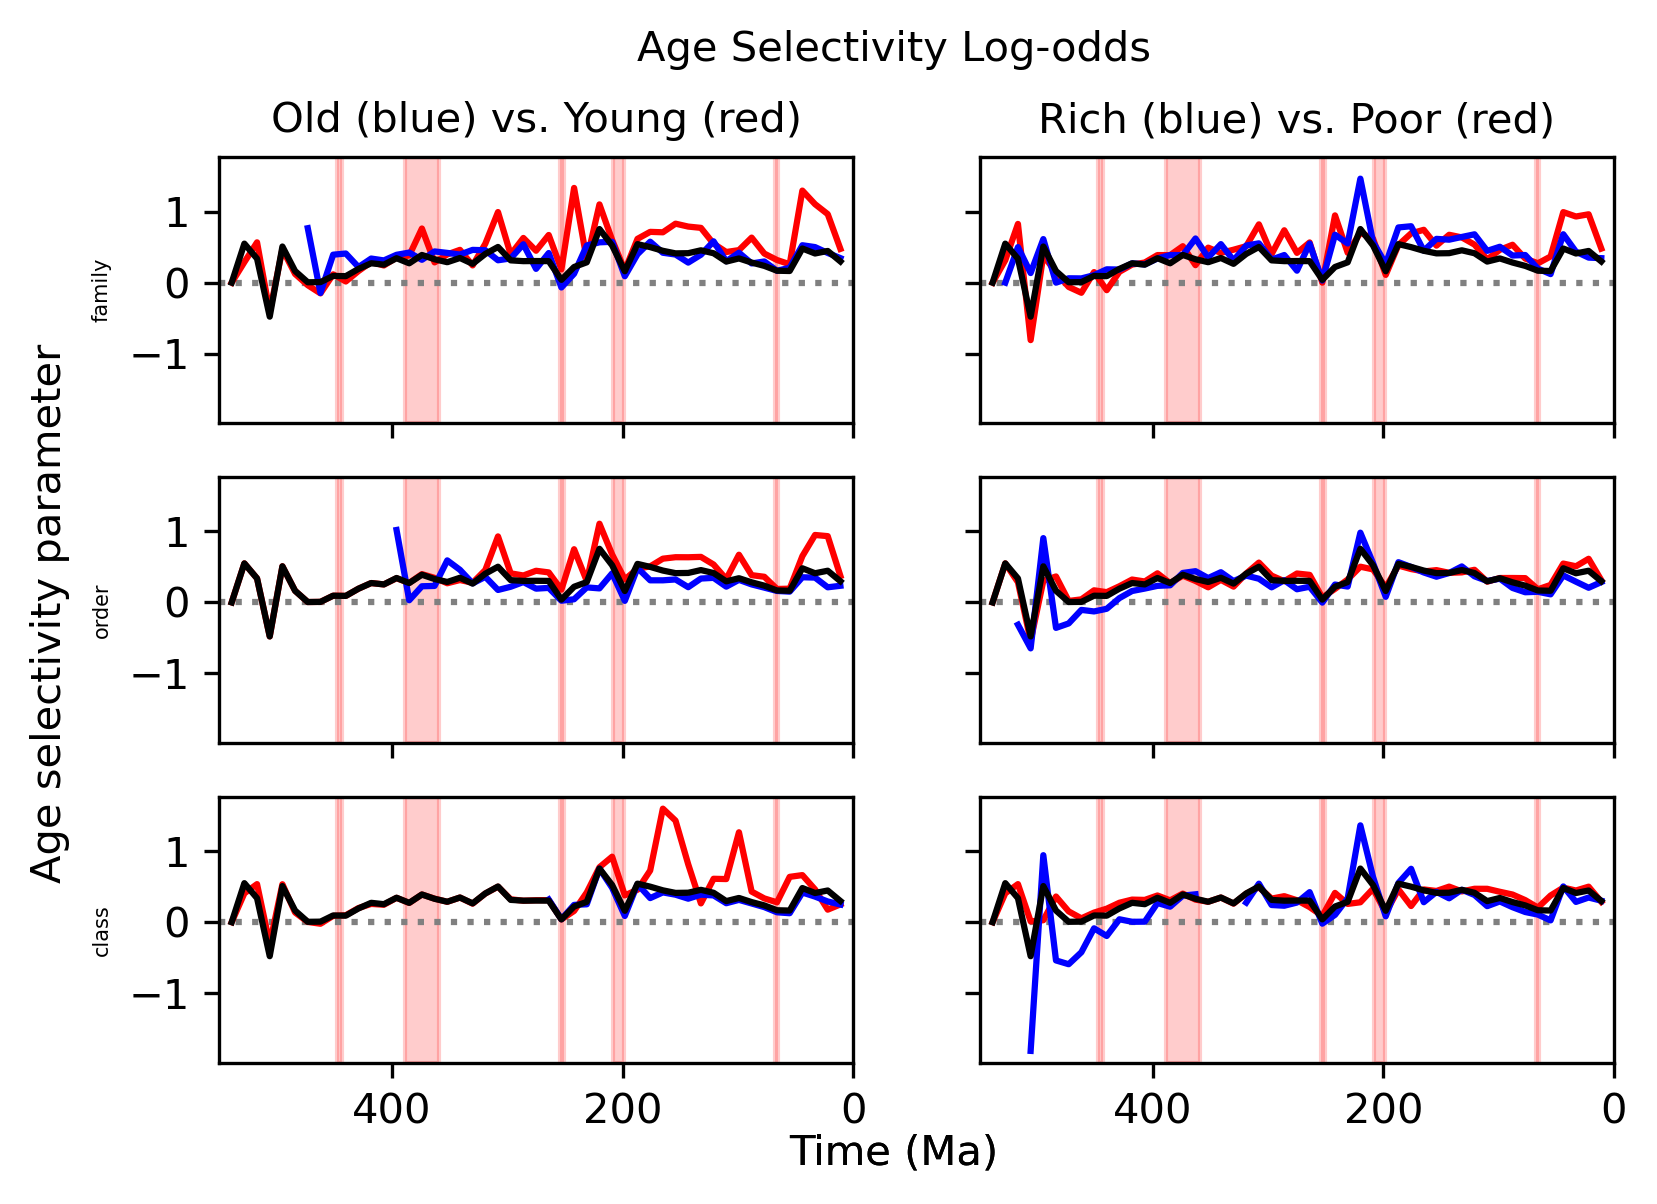

In [17]:
fig, ax = plt.subplots(len(superclade_resolutions),2,sharex=True,sharey=True)
count = 0 

for x in ax.flatten():
    x.axvspan(448, 443, alpha=0.2, color='red')
    x.axvspan(389, 359, alpha=0.2, color='red')
    x.axvspan(254, 251, alpha=0.2, color='red')
    x.axvspan(208, 199, alpha=0.2, color='red')
    x.axvspan(68, 65, alpha=0.2, color='red')

for superclade in persistenceByDuration:
    logOdds_young, logOdds_old = persistenceByDuration[superclade][0][0], persistenceByDuration[superclade][1][0]
    ax[count,0].set_ylabel(superclade,fontsize=5)
    ax[count, 0].plot(bins_to_timeH, logOdds_young, 
                     label="Young %s"%(superclade), color="red")
    ax[count, 0].plot(bins_to_timeH, logOdds_old, 
                     label="Old %s"%(superclade), color="blue")
    ax[count, 0].plot(bins_to_timeH, np.log(logOddsH), 
                     label="All %s"%(superclade), color="black")
    ax[count, 0].hlines([0],t_0, 0, linestyle=":", color="gray")
    logOdds_poor, logOdds_rich = persistenceByRichness[superclade][0][0], persistenceByRichness[superclade][1][0]
    ax[count, 1].plot(bins_to_timeH, logOdds_poor, 
                     label="Poor %s"%(superclade), color="red")
    ax[count, 1].plot(bins_to_timeH, logOdds_rich, 
                     label="Rich %s"%(superclade), color="blue")
    ax[count, 1].plot(bins_to_timeH, np.log(logOddsH), 
                     label="All %s"%(superclade), color="black")
    ax[count, 1].hlines([0],t_0, 0, linestyle=":", color="gray")
    count+=1
fig.text(0.5, 0.04, "Time (Ma)", ha='center')
fig.text(0.02, 0.5, "Age selectivity parameter", va='center', rotation='vertical')
ax[0,0].set_title("Old (blue) vs. Young (red)", fontsize=10)
ax[0,1].set_title("Rich (blue) vs. Poor (red)", fontsize=10)
fig.text(0.5, 0.96, "Age Selectivity Log-odds", ha='center')
fig.text(0.5, 0.04, "Time (Ma)", ha='center')

#for x in ax: x.legend()
for x in ax.flatten(): x.set_xlim(t_0, 0)

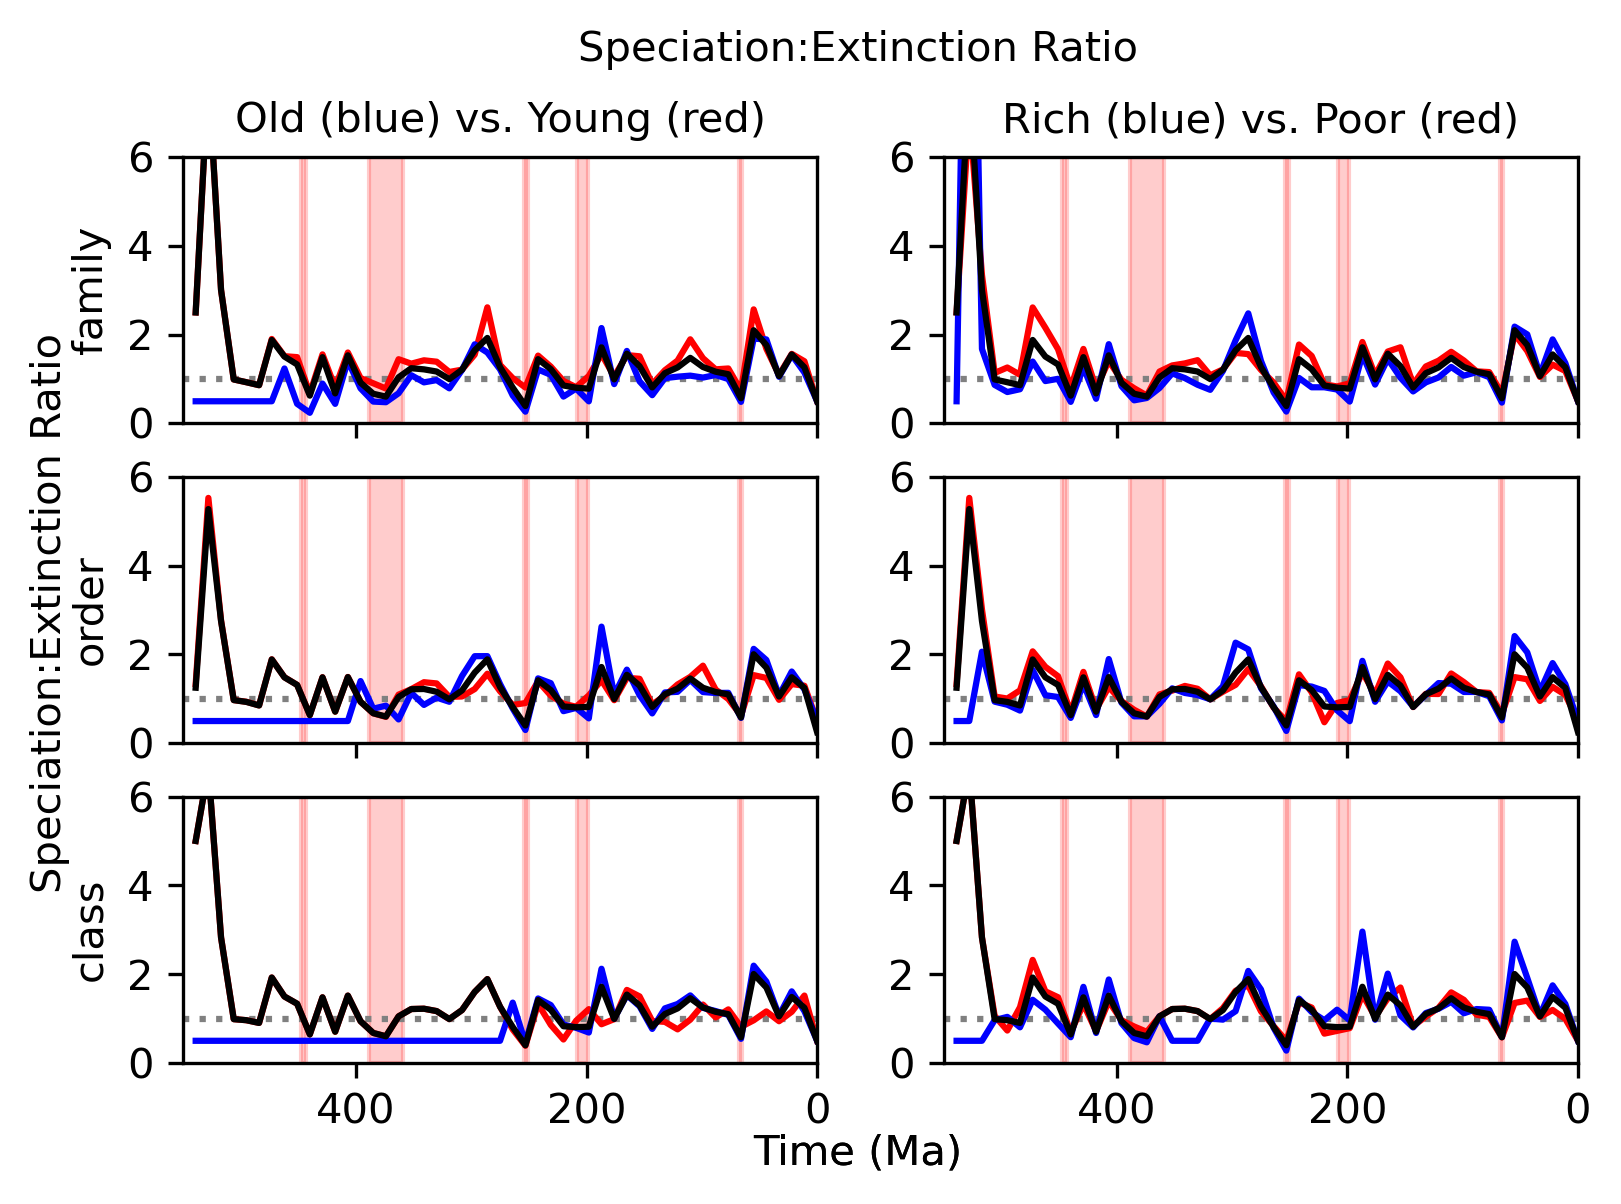

In [222]:
fig, ax = plt.subplots(len(superclade_resolutions),2,sharex=True)
#for a in ax.flatten(): a.set_yscale('log')
#for a in ax.flatten(): a.set_ylim(0,None)
for x in ax.flatten():
    x.set_ylim(0,6)
    x.axvspan(448, 443, alpha=0.2, color='red')
    x.axvspan(389, 359, alpha=0.2, color='red')
    x.axvspan(254, 251, alpha=0.2, color='red')
    x.axvspan(208, 199, alpha=0.2, color='red')
    x.axvspan(68, 65, alpha=0.2, color='red')

bins_to_timeH = np.array(bins_to_timeH)
count = 0 
for superclade in persistenceByDuration:
    spec_young,spec_old = (speciationNumbers[superclade][0], 
                           speciationNumbers[superclade][1])
    surv_young,surv_old = (extinctionNumbers[superclade][0], 
                           extinctionNumbers[superclade][1])
    spec_allduration, surv_allduration = (spec_young+spec_old, surv_young+surv_old)
    spec_poor,spec_rich = (speciationNumbersRichness[superclade][0], 
                           speciationNumbersRichness[superclade][1])
    surv_poor,surv_rich = (extinctionNumbersRichness[superclade][0], 
                           extinctionNumbersRichness[superclade][1])
    spec_allrichness, surv_allrichness = (spec_poor+spec_rich, surv_poor+surv_rich)
    ext_young = countsByAgeSplit[superclade][0] - surv_young
    ext_old = countsByAgeSplit[superclade][1] - surv_old
    ext_allduration = ext_young + ext_old
    ext_poor = countsByRichnessSplit[superclade][0] - surv_poor
    ext_rich = countsByRichnessSplit[superclade][1] - surv_rich
    ext_allrichness = ext_poor + ext_rich
    for x in [ext_poor, ext_rich, ext_old, ext_allrichness, ext_allduration, ext_young]:
        x[x==0]=1
    for y in [spec_poor, spec_rich, spec_old, spec_allrichness,spec_allduration,spec_young]:
        y[y==0]=0.5
    ax[count,0].set_ylabel(superclade)
    ax[count, 0].plot(bins_to_timeH, (spec_young/ext_young), 
                      label="Young %s"%(superclade), color="red")
    ax[count, 0].plot(bins_to_timeH, (spec_old/ext_old),
                      label="Old %s"%(superclade), color="blue")
    ax[count, 0].plot(bins_to_timeH, (spec_allduration/ext_allduration), 
                     label="All %s"%(superclade), color="black")
    ax[count, 0].hlines([1],t_0, 0, linestyle=":", color="gray")
    
    
    ax[count, 1].plot(bins_to_timeH, (spec_poor/ext_poor), 
                      label="Poor %s"%(superclade), color="red")
    ax[count, 1].plot(bins_to_timeH, (spec_rich/ext_rich),
                      label="Rich %s"%(superclade), color="blue")
    ax[count, 1].plot(bins_to_timeH, (spec_allduration/ext_allduration), 
                      label="All %s"%(superclade), color="black")
    ax[count, 1].hlines([1],t_0, 0, linestyle=":", color="gray")

    count+=1
    
genusCountsPerTimeBinYoung

fig.text(0.5, 0.04, "Time (Ma)", ha='center')
fig.text(0.04, 0.5, "Speciation:Extinction Ratio", va='center', rotation='vertical')
ax[0,0].set_title("Old (blue) vs. Young (red)", fontsize=10)
ax[0,1].set_title("Rich (blue) vs. Poor (red)", fontsize=10)
fig.text(0.5, 0.96, "Speciation:Extinction Ratio", ha='center')
fig.text(0.5, 0.04, "Time (Ma)", ha='center')

#for x in ax: x.legend()
for x in ax.flatten(): x.set_xlim(t_0, 0)

In [114]:
for i in range(20): print("All the cells below this one are defunct")

All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct
All the cells below this one are defunct


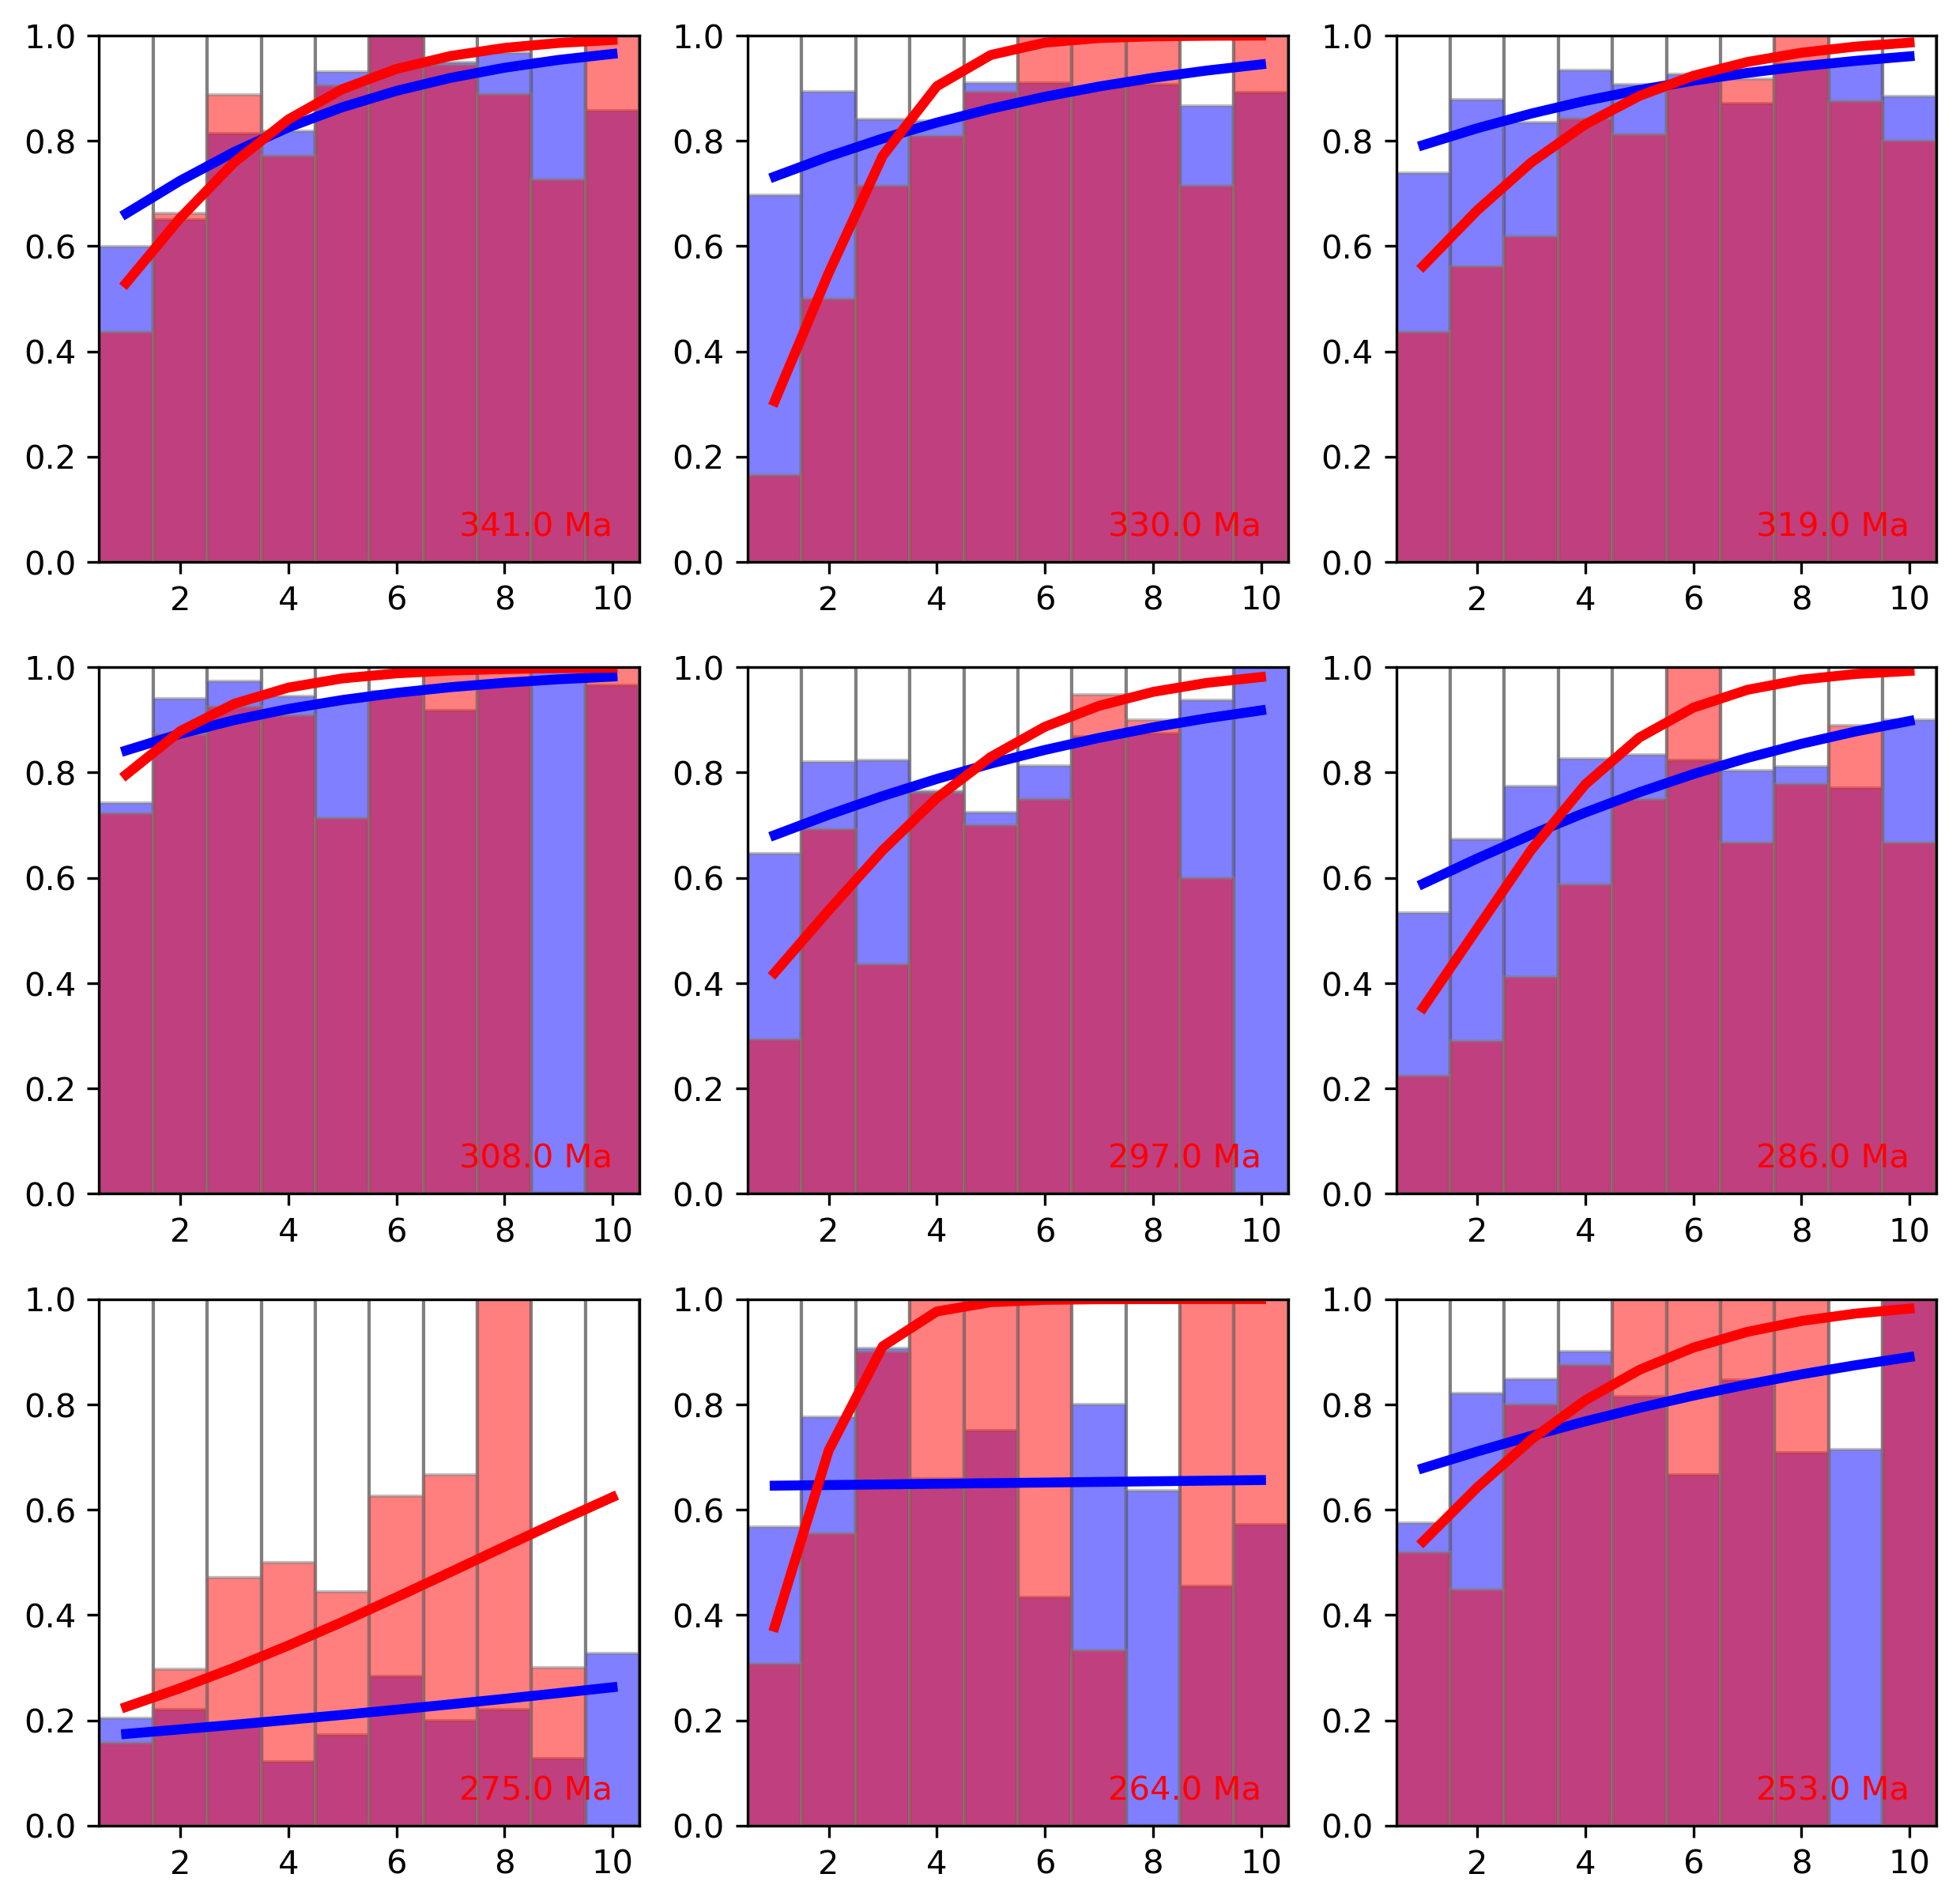

In [29]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
seen = []
for i in range(9):
    test_bin = i + 20 #np.random.randint(bins)
    seen.append(test_bin)
    while (not isinstance(models_midSuper[test_bin], LinearRegression)) and (test_bin not in seen):
        seen.append(test_bin)
        test_bin = np.random.randint(bins)
    ax[i//3, i%3].set_ylim(0,1)
    ax[i//3, i%3].set_xlim(0.5, tail_length + 0.5)
    ax[i//3, i%3].bar(range(1, tail_length + 1), [1]*tail_length,color='white', edgecolor='gray', width=1)
    ax[i//3, i%3].bar(range(1, tail_length + 1), survivalMatricesSuperduper[1][:, test_bin], color='blue', edgecolor='gray', width=1, alpha=0.5)
    ax[i//3, i%3].bar(range(1, tail_length + 1), survivalMatricesSuperduper[0][:, test_bin], color='red', edgecolor='gray', width=1, alpha=0.5)

    #print("log-odds:", np.log(np.e ** models[test_bin].coef_[0][0]))
    ax[i//3, i%3].text(10, 0.05, str(t_0 - (bin_size_hierarchical * (test_bin - 1))) + " Ma", color="red", horizontalalignment="right")
    #ax[i//3, i%3].text(10, 0.25, round(np.log(np.e ** models_youngSuper[test_bin].coef_[0][0]), 3), color="red", horizontalalignment="right")
    ax[i//3, i%3].plot(range(1, tail_length + 1), models_midSuper[test_bin].predict(np.array(list(range(0, tail_length))).reshape(-1, 1)), color="blue", linewidth=3)
    ax[i//3, i%3].plot(range(1, tail_length + 1), models_youngSuper[test_bin].predict(np.array(list(range(0, tail_length))).reshape(-1, 1)), color="red", linewidth=3)
    #ax[i//3, i%3].plot(range(1, tail_length + 1), models_oldSuper[test_bin].predict(np.array(list(range(0, tail_length))).reshape(-1, 1)), color="green", linewidth=3)

20399
18612


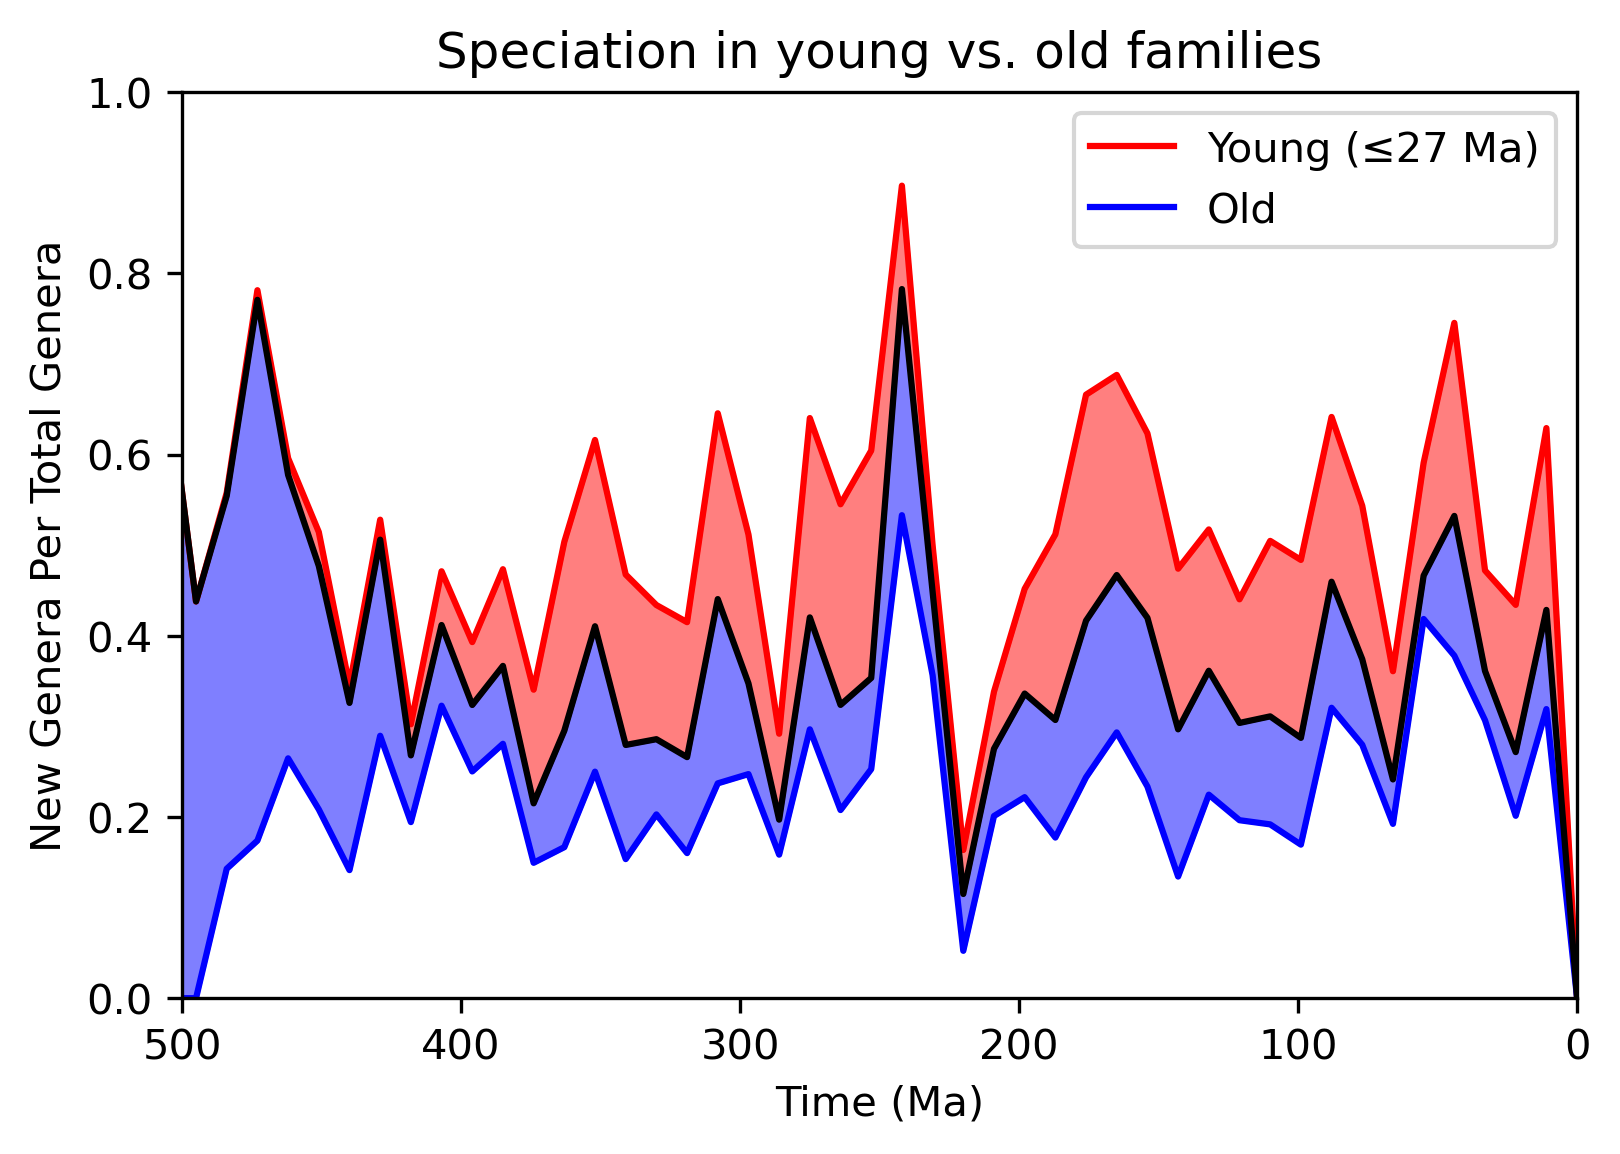

In [48]:
num_per_bin_young = np.array([sum(x) for x in countsFam[0]])
num_per_bin_old = np.array([sum(x) for x in countsFam[1]])
num_per_bin_old_young = num_per_bin_young + num_per_bin_old
for x in [num_per_bin_young, num_per_bin_old, num_per_bin_old_young]:
    x[x==0] = 1

plt.title("Speciation in young vs. old families")
plt.plot(bins_to_timeH, speciationFam[0] / num_per_bin_young, color="red", label="Young (≤%i Ma)"%(young_cutoff_fam*bin_size))
plt.plot(bins_to_timeH, speciationFam[1] / num_per_bin_old, color="blue", label="Old")
plt.plot(bins_to_timeH, (speciationFam[0] + speciationFam[1]) / num_per_bin_old_young, color="black")
plt.fill_between(x=bins_to_timeH, y1=speciationFam[0] / np.array(num_per_bin_young), y2=(speciationFam[0] + speciationFam[1]) / num_per_bin_old_young, color="red", alpha=0.5)
plt.fill_between(x=bins_to_timeH, y1=speciationFam[1] / np.array(num_per_bin_old), y2=(speciationFam[0] + speciationFam[1]) / num_per_bin_old_young, color="blue", alpha=0.5)

#plt.plot(bins_to_timeH, speciationNumsH / age_counts_all, color="black")
plt.gca().invert_xaxis()
plt.xlim(500,0)
plt.ylim(0,1)

plt.legend()

plt.xlabel("Time (Ma)")
plt.ylabel("New Genera Per Total Genera")

print(np.sum(age_counts_family_young))
print(np.sum(age_counts_family_mid))

In [85]:
#plt.plot(num_per_bin_young, label="young")
#plt.plot(num_per_bin_old)
#plt.legend()

Local save of requested search found.

(117, 100)
Cephalopoda


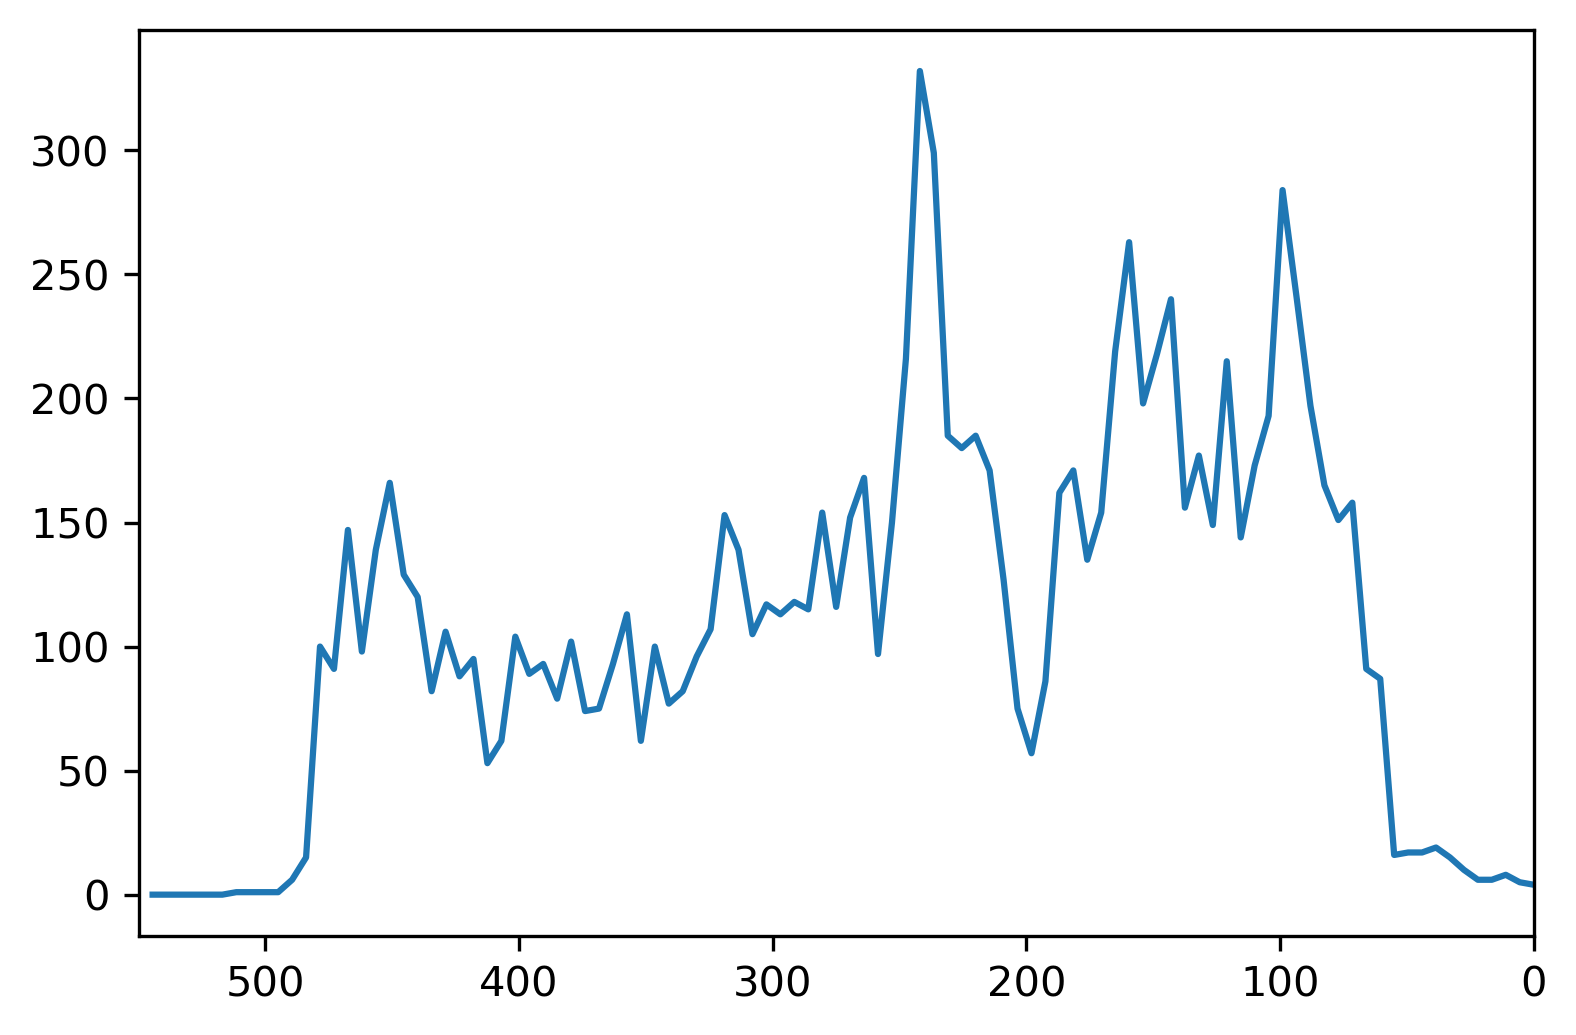

In [73]:
example_class = "Cephalopoda"

subcladeStartEnds = getSubcladeAgeRanges(subcladeDict, min_occurence_threshold=min_occurrences)
classRichnessMatrix, classRichnessLabels = getSuperCladeRichnessMatrix(classCohorts, subcladeStartEnds, n_bins=bins_hierarchical, t_0=t_0)
print(classRichnessMatrix.shape)
try:
    ind = classRichnessLabels.index(example_class)
except:
    ind = np.random.randint(classRichnessMatrix.shape[0])
ys = classRichnessMatrix[ind, :]
plt.plot(bins_to_timeH, ys)
plt.xlim(t_0,0)
print(classRichnessLabels[ind])

In [74]:
poor_cutoff = 200
rich_cutoff = 100000000000000

survivalMatricesByClassRichness = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                             taxDict=taxDictClass, supercladeRichnessMatrix=classRichnessMatrix, 
                                             taxon_labels=labelsH, super_labels=classRichnessLabels, 
                                             young_cutoff=poor_cutoff, mid_cutoff=rich_cutoff)

_, richnessCountsClass = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                     taxDict=taxDictClass, supercladeRichnessMatrix=classRichnessMatrix, 
                                     taxon_labels=labelsH, super_labels=classRichnessLabels, 
                                     young_cutoff=poor_cutoff, mid_cutoff=rich_cutoff, 
                                     proportions=False)

74051 young subclades 51116 mid subclades and 0 old subclades
checked: 127691 assigned: 125167 ratio: 0.9802335325120799
74051 young subclades 51116 mid subclades and 0 old subclades
checked: 127691 assigned: 125167 ratio: 0.9802335325120799


In [75]:
orderRichnessMatrix, orderRichnessLabels = getSuperCladeRichnessMatrix(orderCohorts, subcladeStartEnds, n_bins=bins_hierarchical, t_0=t_0)

Local save of requested search found.



7.0 40.22283813747229


Text(0, 0.5, 'Number of orders')

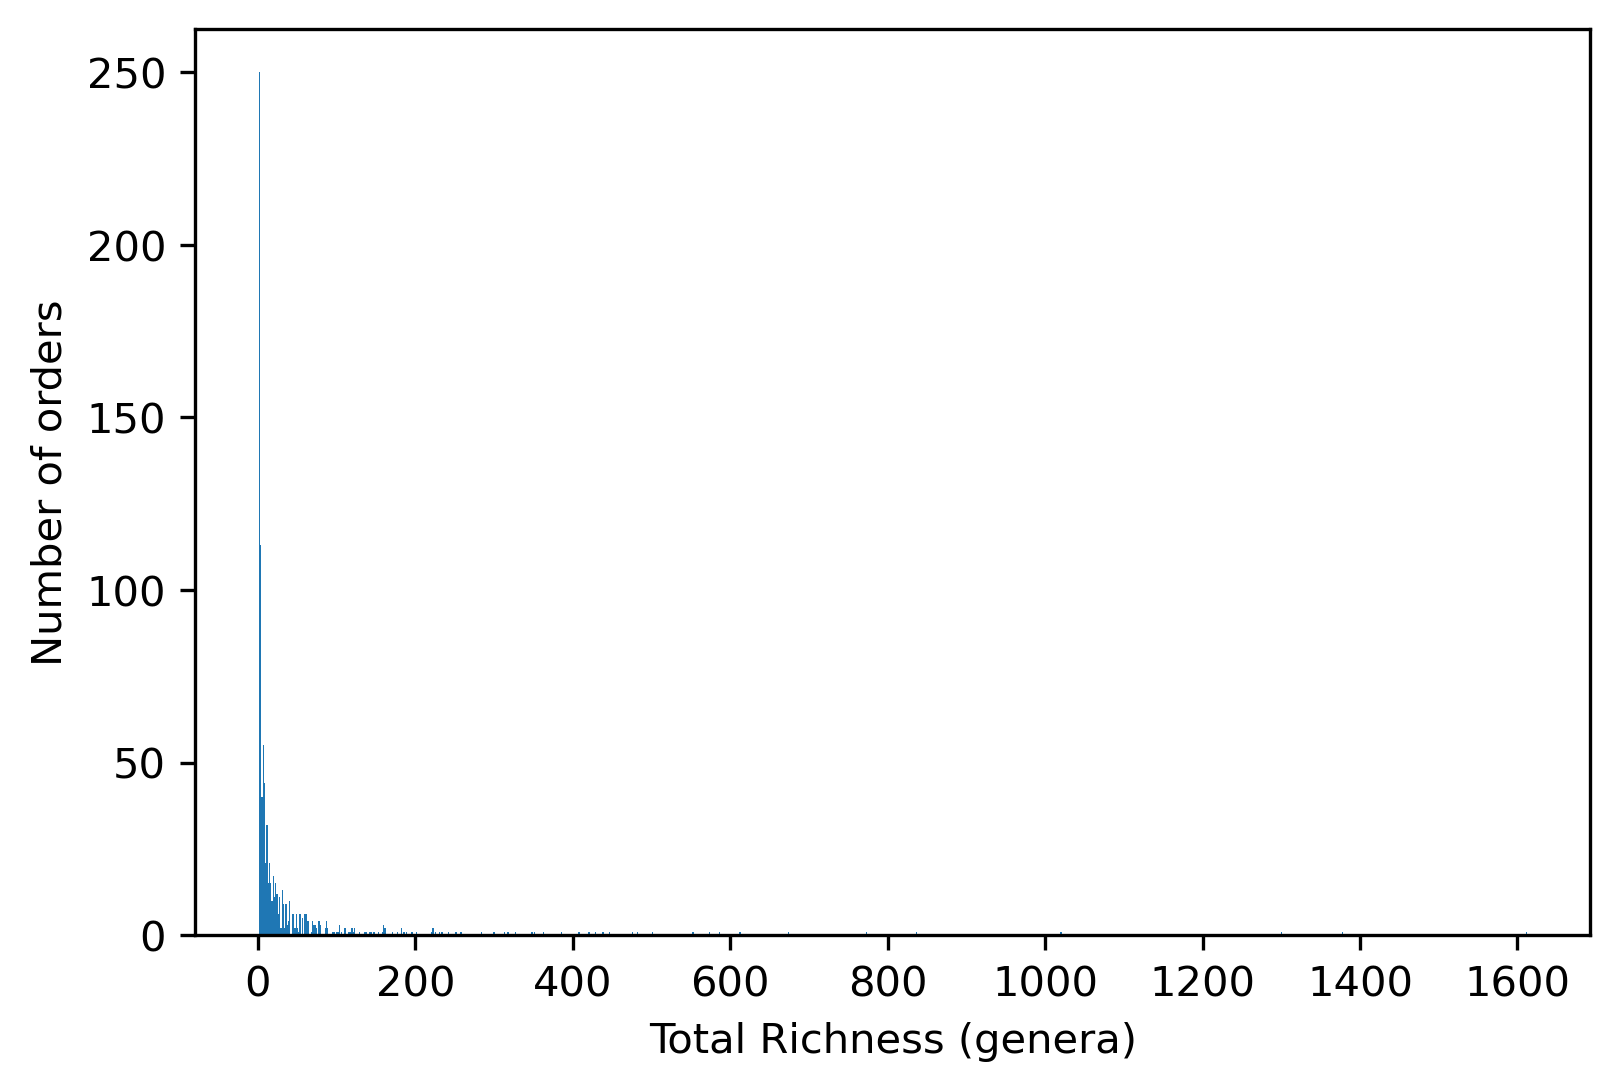

In [76]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
#ax.set_yscale('log')

ax.hist([len(orderCohorts[x]) for x in orderCohorts], bins=1000)
print(np.median([len(orderCohorts[x]) for x in orderCohorts]), np.mean([len(orderCohorts[x]) for x in orderCohorts]))

ax.set_xlabel("Total Richness (genera)")
ax.set_ylabel("Number of orders")

In [77]:
poor_cutoff_spec = 20
poor_cutoff_ext = 4
rich_cutoff = 100000000000000
ord_to_self_dict = {x:x for x in orderRichnessLabels+superduper_labels}
speciationFamRichness = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                         taxDict=taxDictOrder, supercladeRichnessMatrix=orderRichnessMatrix, 
                                         taxon_labels=labelsH, super_labels=orderRichnessLabels, young_cutoff=poor_cutoff_spec, 
                                         mid_cutoff=rich_cutoff, speciation=True)

_, countsFamRichnessSp = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=0, 
                                             taxDict=taxDictOrder, supercladeRichnessMatrix=orderRichnessMatrix, 
                                             taxon_labels=labelsH, super_labels=orderRichnessLabels, young_cutoff=poor_cutoff_spec, 
                                             mid_cutoff=rich_cutoff, proportions=False)

extinctionFamRichness, countsFamRichness = getSurvivalMatrix(durationMatrixMetazoaSuperduper, max_tail=bins_hierarchical, min_per_bin=min_per_bin, 
                                             taxDict=ord_to_self_dict, supercladeRichnessMatrix=orderRichnessMatrix, 
                                             taxon_labels=superduper_labels, super_labels=orderRichnessLabels, young_cutoff=poor_cutoff_ext, 
                                             mid_cutoff=rich_cutoff, proportions=False)


14355 young subclades 20123 mid subclades and 0 old subclades
checked: 38248 assigned: 34478 ratio: 0.9014327546538381
42956 young subclades 74089 mid subclades and 0 old subclades
checked: 127691 assigned: 117045 ratio: 0.9166268570220297
15865 young subclades 6353 mid subclades and 0 old subclades
checked: 22597 assigned: 22218 ratio: 0.9832278621055892


Text(0, 0.5, 'New Genera Per Total Genera')

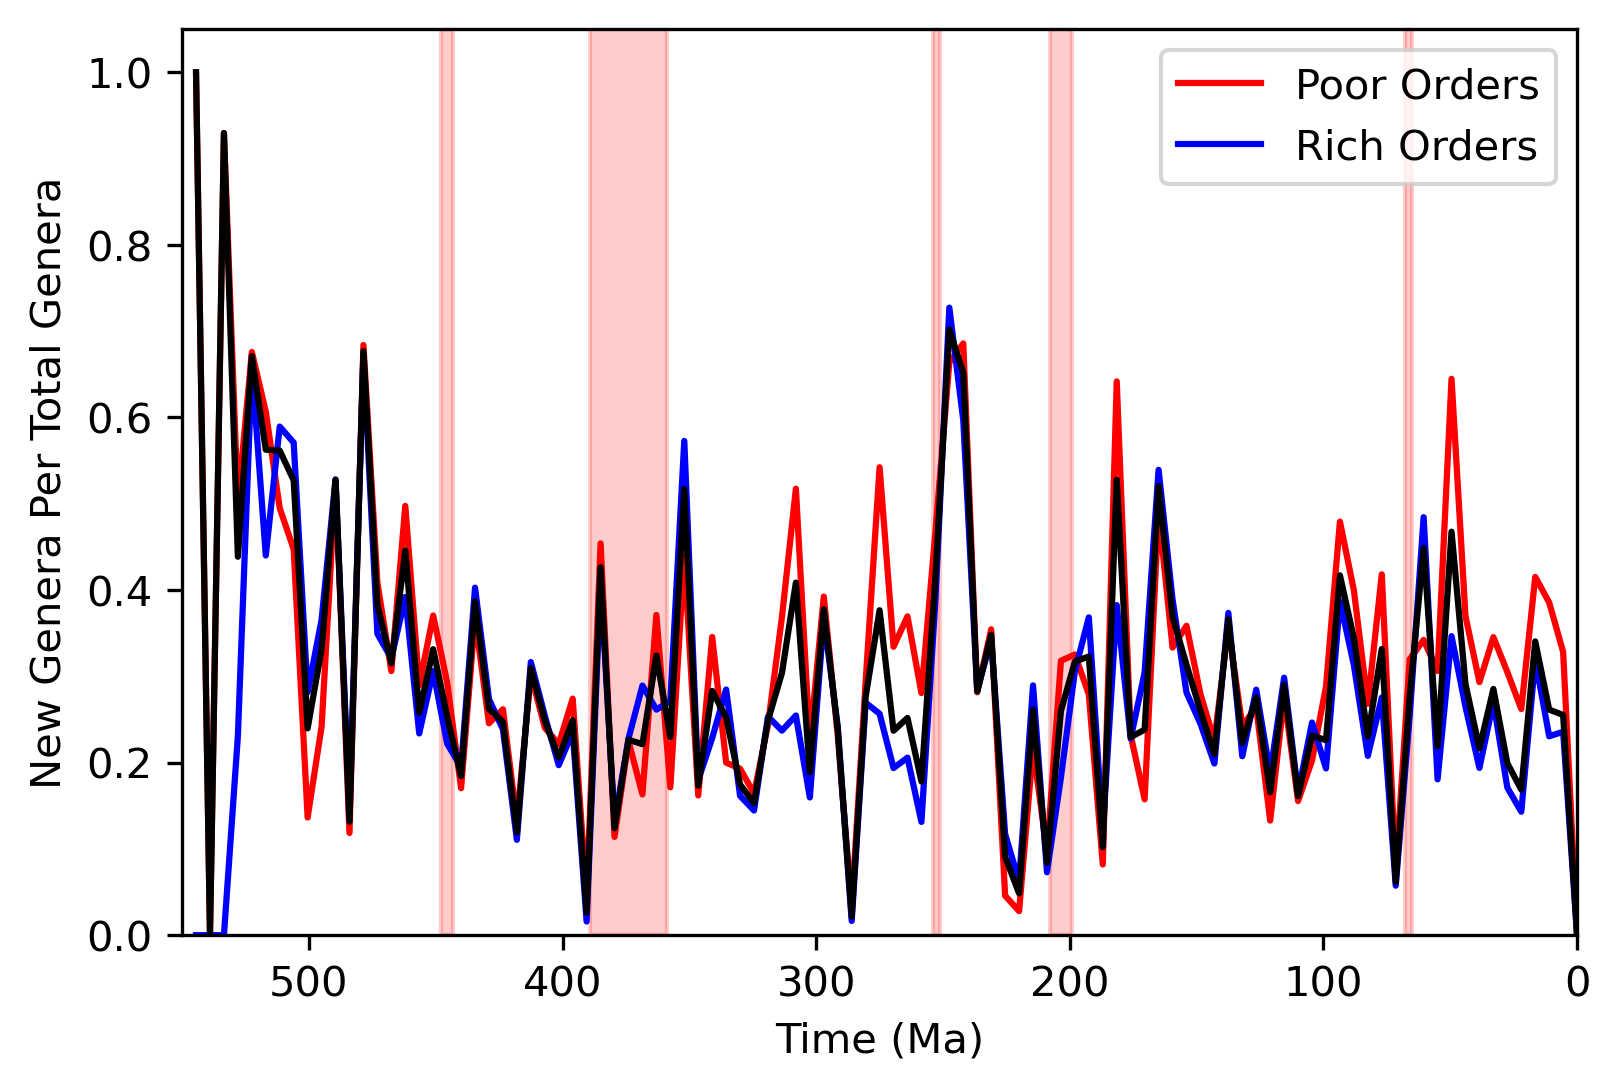

In [80]:
fig, ax = plt.subplots()
num_per_bin_poor = np.array([sum(x) for x in countsFamRichnessSp[0]])
num_per_bin_rich = np.array([sum(x) for x in countsFamRichnessSp[1]])
num_per_bin_total = num_per_bin_poor + num_per_bin_rich
for x in [num_per_bin_poor, num_per_bin_rich, num_per_bin_total]:
    x[x==0] = 1
ax.plot(bins_to_timeH, speciationFamRichness[0] / num_per_bin_poor, color="red", label="Poor Orders")
ax.plot(bins_to_timeH, speciationFamRichness[1] / num_per_bin_rich, color="blue", label="Rich Orders")
plt.plot(bins_to_timeH, (speciationFamRichness[0] + speciationFamRichness[1]) / num_per_bin_total, color="black")
#plt.fill_between(x=bins_to_timeH, y1=speciationFamRichness[0], y2=(speciationFam[0] + speciationFam[1]), color="red", alpha=0.5)
#plt.fill_between(x=bins_to_timeH, y1=speciationFamRichness[1], y2=(speciationFam[0] + speciationFam[1]), color="blue", alpha=0.5)

#plt.plot(bins_to_timeH, speciationNumsH / age_counts_all, color="black")
plt.gca().invert_xaxis()
plt.xlim(t_0,0)
plt.ylim(0,None)

ax.axvspan(448, 443, alpha=0.2, color='red')
ax.axvspan(389, 359, alpha=0.2, color='red')
ax.axvspan(254, 251, alpha=0.2, color='red')
ax.axvspan(208, 199, alpha=0.2, color='red')
ax.axvspan(68, 65, alpha=0.2, color='red')

plt.legend()
plt.xlabel("Time (Ma)")
plt.ylabel("New Genera Per Total Genera")

Text(0, 0.5, 'Surviving Orders Per Total Orders')

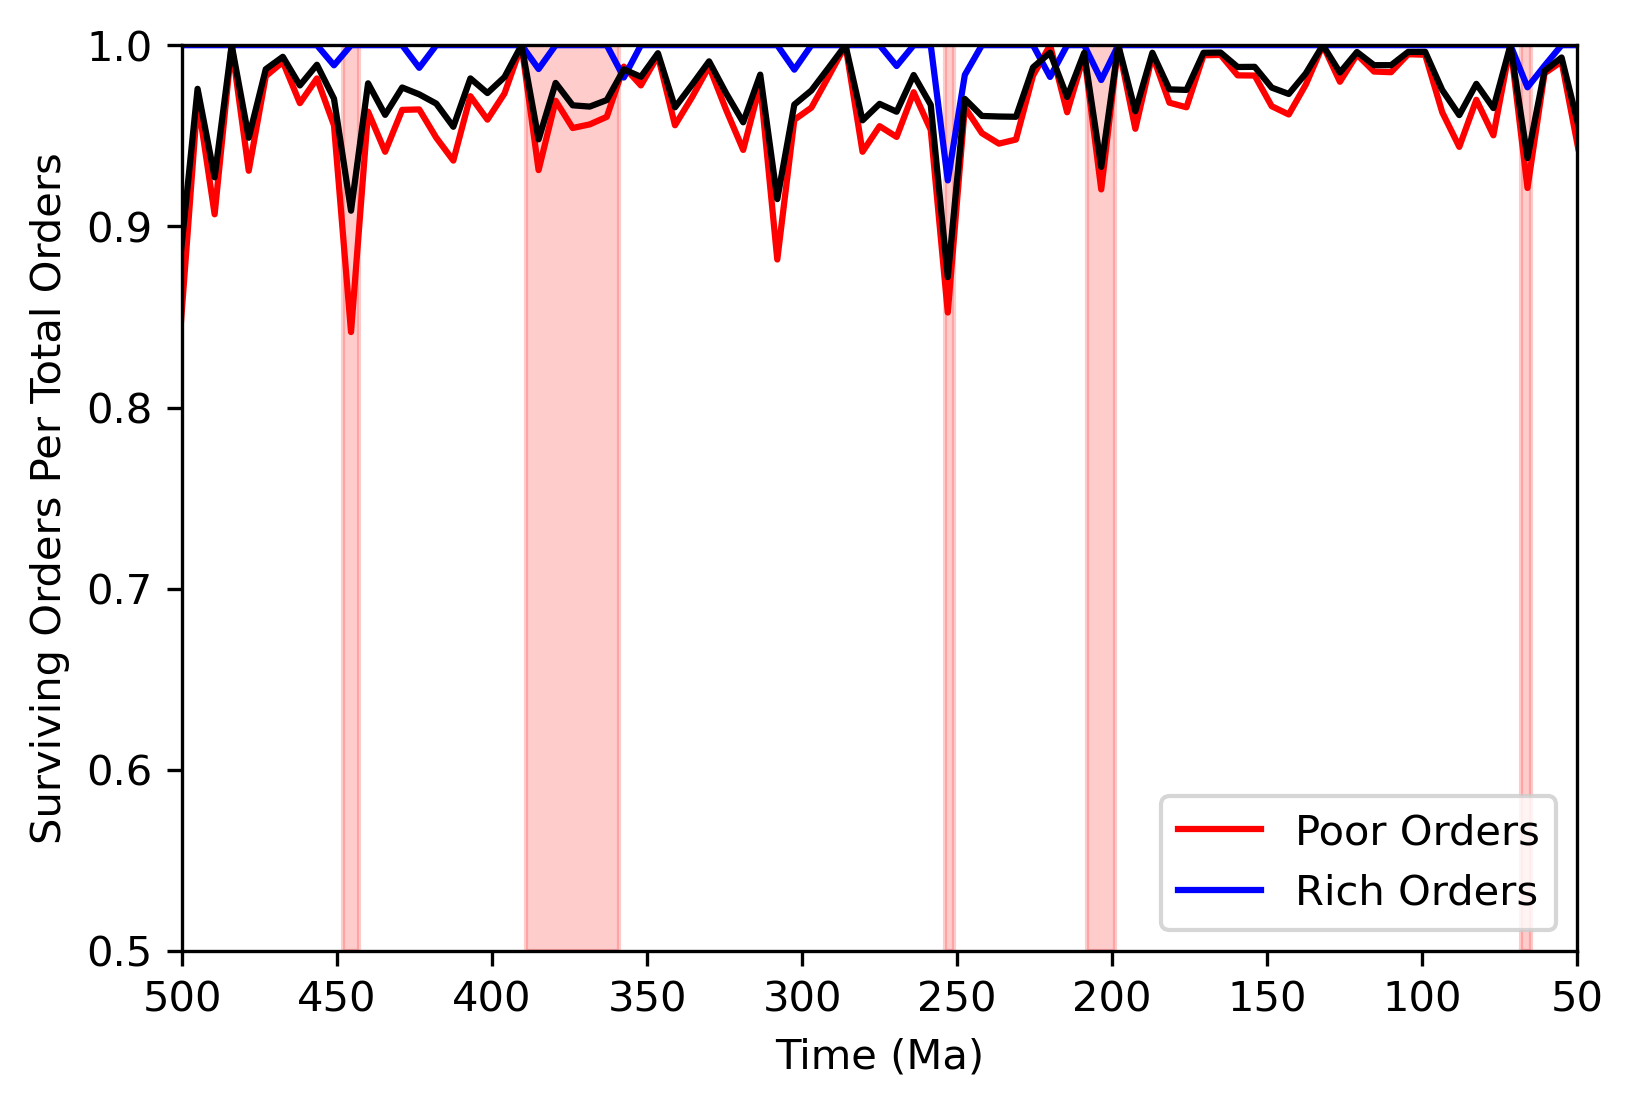

In [84]:
fig, ax = plt.subplots()
#print(np.sum(extinctionFamRichness[0], axis=0))
extinctionFamRichnessFixed = [np.sum(x, axis=0) for x in extinctionFamRichness]
num_per_bin_poor = np.array([sum(x) for x in countsFamRichness[0]])
num_per_bin_rich = np.array([sum(x) for x in countsFamRichness[1]])
num_per_bin_total = num_per_bin_poor + num_per_bin_rich
for x in [num_per_bin_poor, num_per_bin_rich, num_per_bin_total]:
    x[x==0] = 1
ax.plot(bins_to_timeH, extinctionFamRichnessFixed[0] / num_per_bin_poor, color="red", label="Poor Orders")
ax.plot(bins_to_timeH, extinctionFamRichnessFixed[1] / num_per_bin_rich, color="blue", label="Rich Orders")
plt.plot(bins_to_timeH, (extinctionFamRichnessFixed[0] + extinctionFamRichnessFixed[1]) / num_per_bin_total, color="black")
#plt.fill_between(x=bins_to_timeH, y1=speciationFamRichness[0], y2=(speciationFam[0] + speciationFam[1]), color="red", alpha=0.5)
#plt.fill_between(x=bins_to_timeH, y1=speciationFamRichness[1], y2=(speciationFam[0] + speciationFam[1]), color="blue", alpha=0.5)

#plt.plot(bins_to_timeH, speciationNumsH / age_counts_all, color="black")
plt.gca().invert_xaxis()
plt.xlim(500,50)
plt.ylim(0.5,1)

ax.axvspan(448, 443, alpha=0.2, color='red')
ax.axvspan(389, 359, alpha=0.2, color='red')
ax.axvspan(254, 251, alpha=0.2, color='red')
ax.axvspan(208, 199, alpha=0.2, color='red')
ax.axvspan(68, 65, alpha=0.2, color='red')

plt.legend()
plt.xlabel("Time (Ma)")
plt.ylabel("Surviving Orders Per Total Orders")

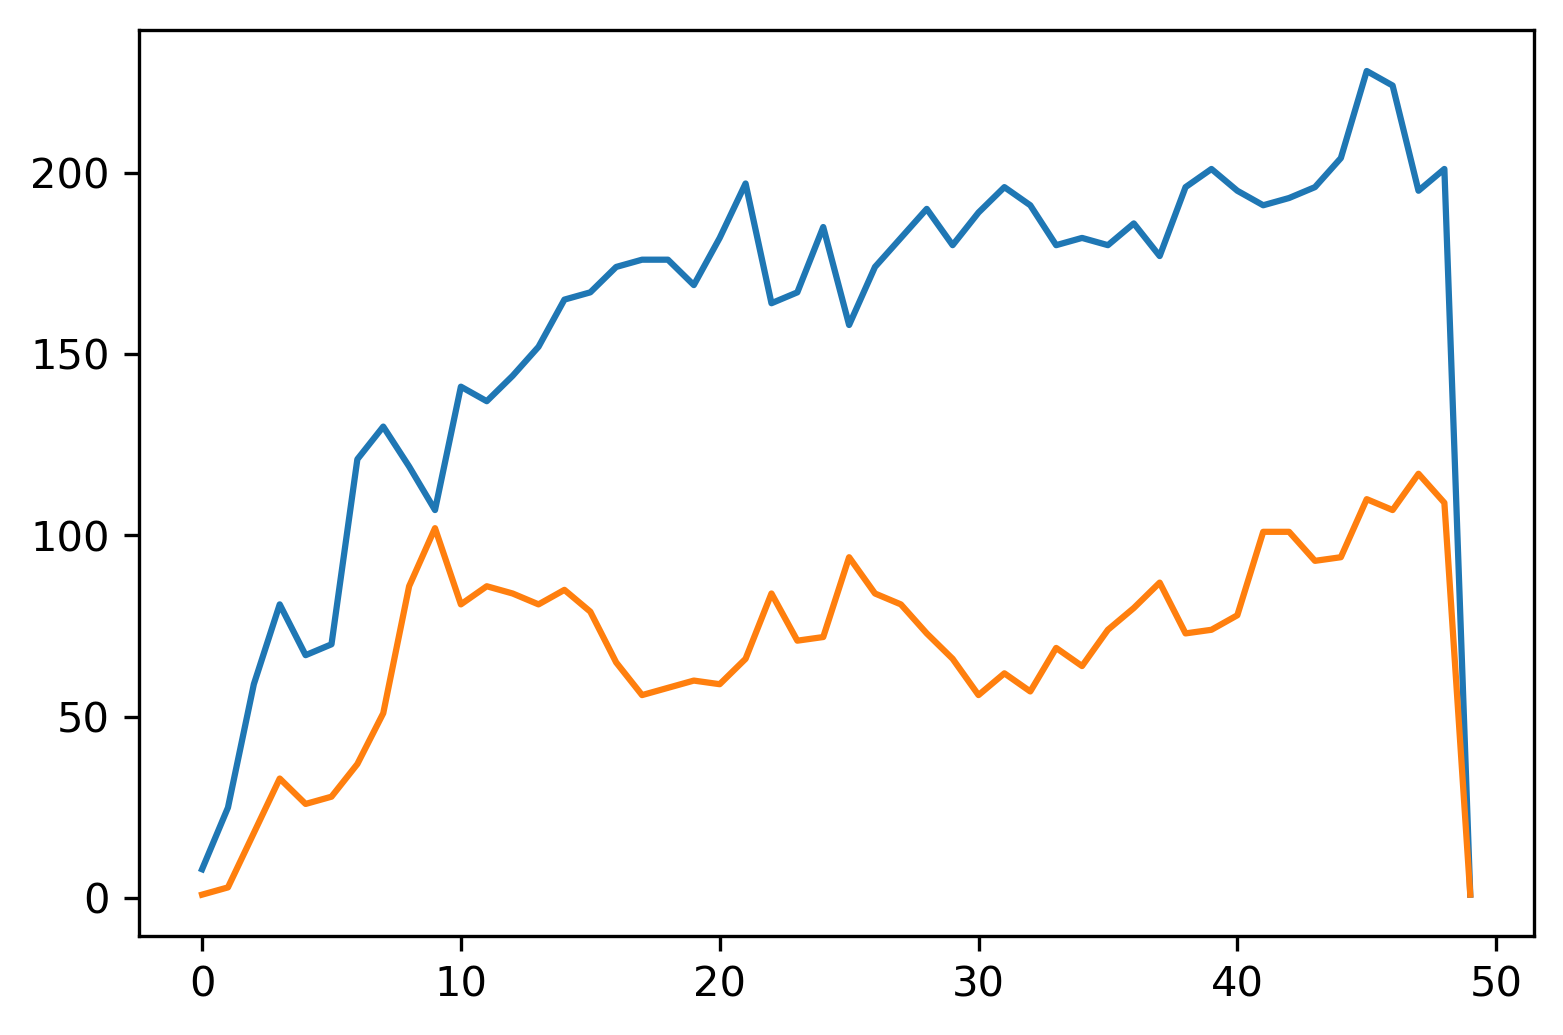

In [36]:
#plt.plot(num_per_bin_poor)
#plt.plot(num_per_bin_rich)

In [24]:
num_taxa = durationMatrixMetazoa.shape[0]
num_bootstraps = 0

logOdds, models, bs = getLogOdds(survivalMatrixMetazoa, num_taxa, count_by_bin = ageByBinMetazoa,
                                 num_bootstraps=num_bootstraps, ignore_youngest=False, verbose=True)

print(len(logOdds), len(models))

Time bin: 99 / 100
100 100


In [25]:
logOddsCons, modelsCons, bsCons = getLogOdds(survivalMatrixMetazoa, num_taxa, count_by_bin = ageByBinMetazoa, num_bootstraps=num_bootstraps, ignore_youngest=True)

In [26]:
print(len(countsFam), len(countsFam[0]), survivalMatrices[0].shape)

3 50 (10, 50)


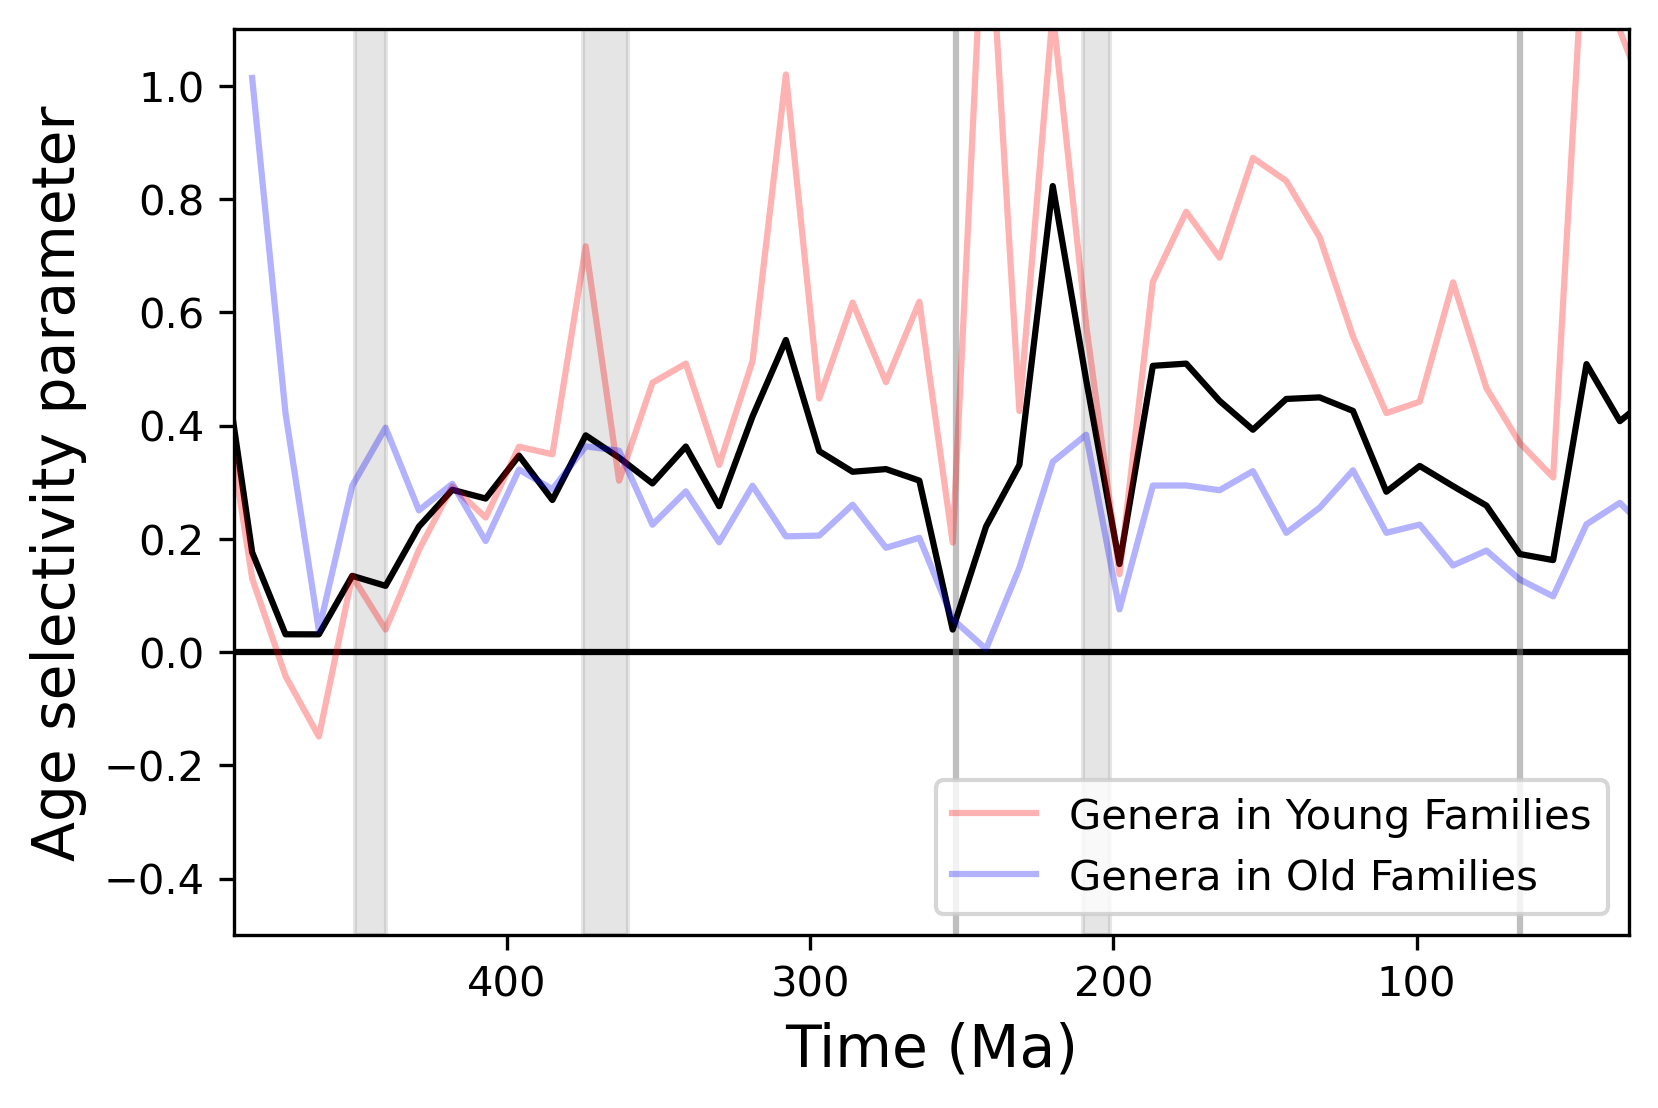

In [30]:
fig, ax = plt.subplots()
#fig.set_size_inches(20, 10)
bins_to_time = [(t_0 - (bin_size_hierarchical * x)) - (1 * bin_size_hierarchical) for x in range(bins_hierarchical)]
#ax.scatter([(start + end) / 2 for start, end in LIPs], [-0.1] * len(LIPs), color="red")
ax.hlines(0, 0, t_0, color="black")
ax.vlines([252, 66], -5, 5, alpha=0.5, color="gray")
ax.axvspan(375, 360, alpha=0.2, color='gray')
ax.axvspan(450, 440, alpha=0.2, color='gray')
ax.axvspan(201, 210, alpha=0.2, color='gray')
#ax.bar([t_0 - (bin_size * x) - (0.5 * bin_size) for x in np.linspace(0, bins, num=high_res_bins)], [x if x>0 else 0 for x in extinctionRatesHighRes],
#        color="gray",width=1,bottom=0)

ax.plot(bins_to_time,[np.log(x) for x in logOddsH], color="black")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds], s=20, color="black")

ax.plot(bins_to_time[:],[np.log(x) for x in logOdds_youngSuper][:], color="red", alpha=0.3, label="Genera in Young Families")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_youngSuper], s=20, color="red")

ax.plot(bins_to_time[:],[np.log(x) for x in logOdds_midSuper][:], color="blue", alpha=0.3, label="Genera in Old Families")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_midSuper], s=20, color="purple")

#ax.plot(bins_to_time,[np.log(x) for x in logOdds_oldSuper], color="green", alpha=0.3, label="Genera in Old Families")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_oldSuper], s=20, color="blue")

ax.legend(fontsize=10, loc='lower right')
plt.xlabel("Time (Ma)", fontsize=14)
plt.ylabel("Age selectivity parameter", fontsize=14)
plt.xlim(30,490)
plt.ylim(-0.5, 1.1)
plt.gca().invert_xaxis()

[539.0, 528.0, 517.0, 506.0, 495.0, 484.0, 473.0, 462.0, 451.0, 440.0, 429.0, 418.0, 407.0, 396.0, 385.0, 374.0, 363.0, 352.0, 341.0, 330.0, 319.0, 308.0, 297.0, 286.0, 275.0, 264.0, 253.0, 242.0, 231.0, 220.0, 209.0, 198.0, 187.0, 176.0, 165.0, 154.0, 143.0, 132.0, 121.0, 110.0, 99.0, 88.0, 77.0, 66.0, 55.0, 44.0, 33.0, 22.0, 11.0, 0.0]


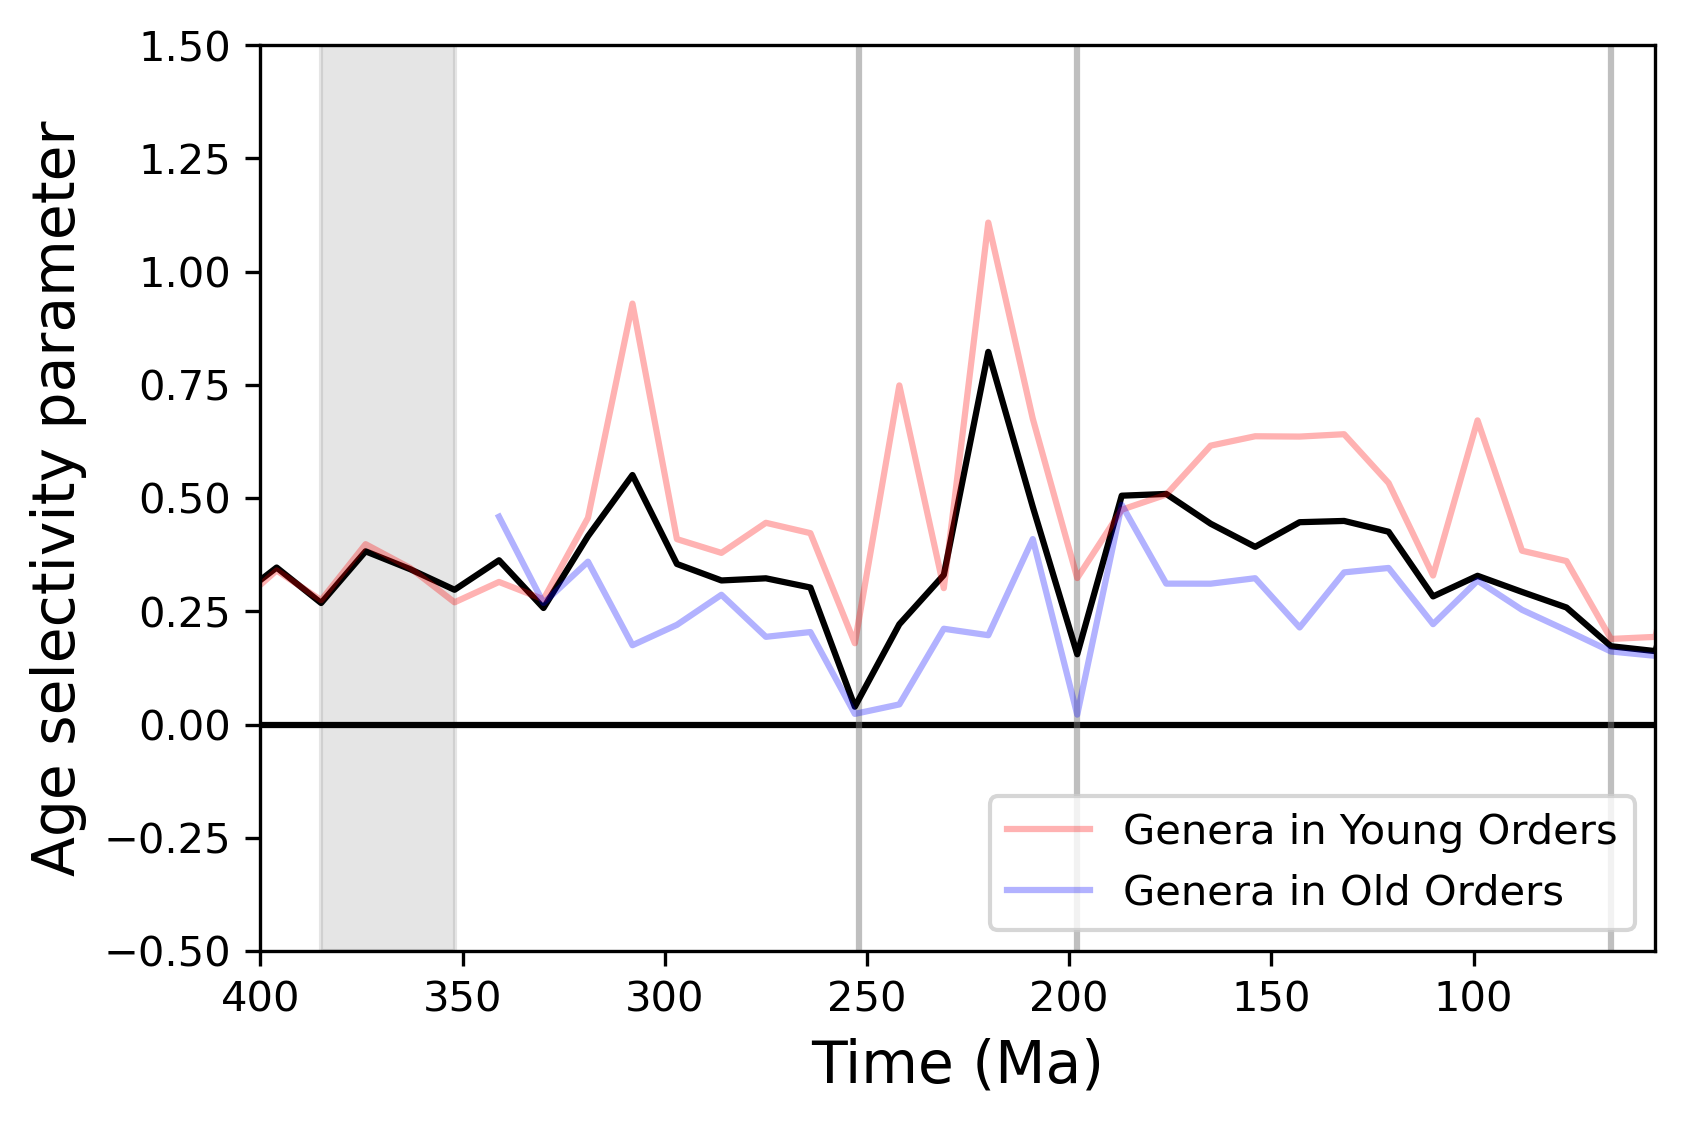

In [31]:
#Old vs young orders

fig, ax = plt.subplots()
#fig.set_size_inches(20, 10)
bins_to_time = [(t_0 - (bin_size_hierarchical * x)) - (1 * bin_size_hierarchical) for x in range(bins_hierarchical)]
#ax.scatter([(start + end) / 2 for start, end in LIPs], [-0.1] * len(LIPs), color="red")
ax.hlines(0, 0, t_0, color="black")
ax.vlines([252, 66, 198], -5, 5, alpha=0.5, color="gray")
ax.axvspan(385, 352, alpha=0.2, color='gray')
ax.axvspan(450, 440, alpha=0.2, color='gray')
#ax.axvspan(198, 209, alpha=0.2, color='gray')
#ax.bar([t_0 - (bin_size * x) - (0.5 * bin_size) for x in np.linspace(0, bins, num=high_res_bins)], [x if x>0 else 0 for x in extinctionRatesHighRes],
#        color="gray",width=1,bottom=0)

ax.plot(bins_to_time,[np.log(x) for x in logOddsH], color="black")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds], s=20, color="black")

ax.plot(bins_to_time[start_order_young:],[np.log(x) for x in logOdds_youngSuperduper][start_order_young:], color="red", alpha=0.3, label="Genera in Young Orders")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_youngSuper], s=20, color="red")
ax.plot(bins_to_time[start_order_mid:],[np.log(x) for x in logOdds_midSuperduper][start_order_mid:], color="blue", alpha=0.3, label="Genera in Old Orders")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_midSuper], s=20, color="purple")

#ax.plot(bins_to_time,[np.log(x) for x in logOdds_oldSuperduper], color="blue", alpha=0.3, label="Genera in Old Orders")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_oldSuper], s=20, color="blue")

ax.legend(fontsize=10, loc='lower right')
plt.xlabel("Time (Ma)", fontsize=14)
plt.ylabel("Age selectivity parameter", fontsize=14)
plt.xlim(55,400)
plt.ylim(-0.5,1.5)
plt.gca().invert_xaxis()
print(bins_to_time)

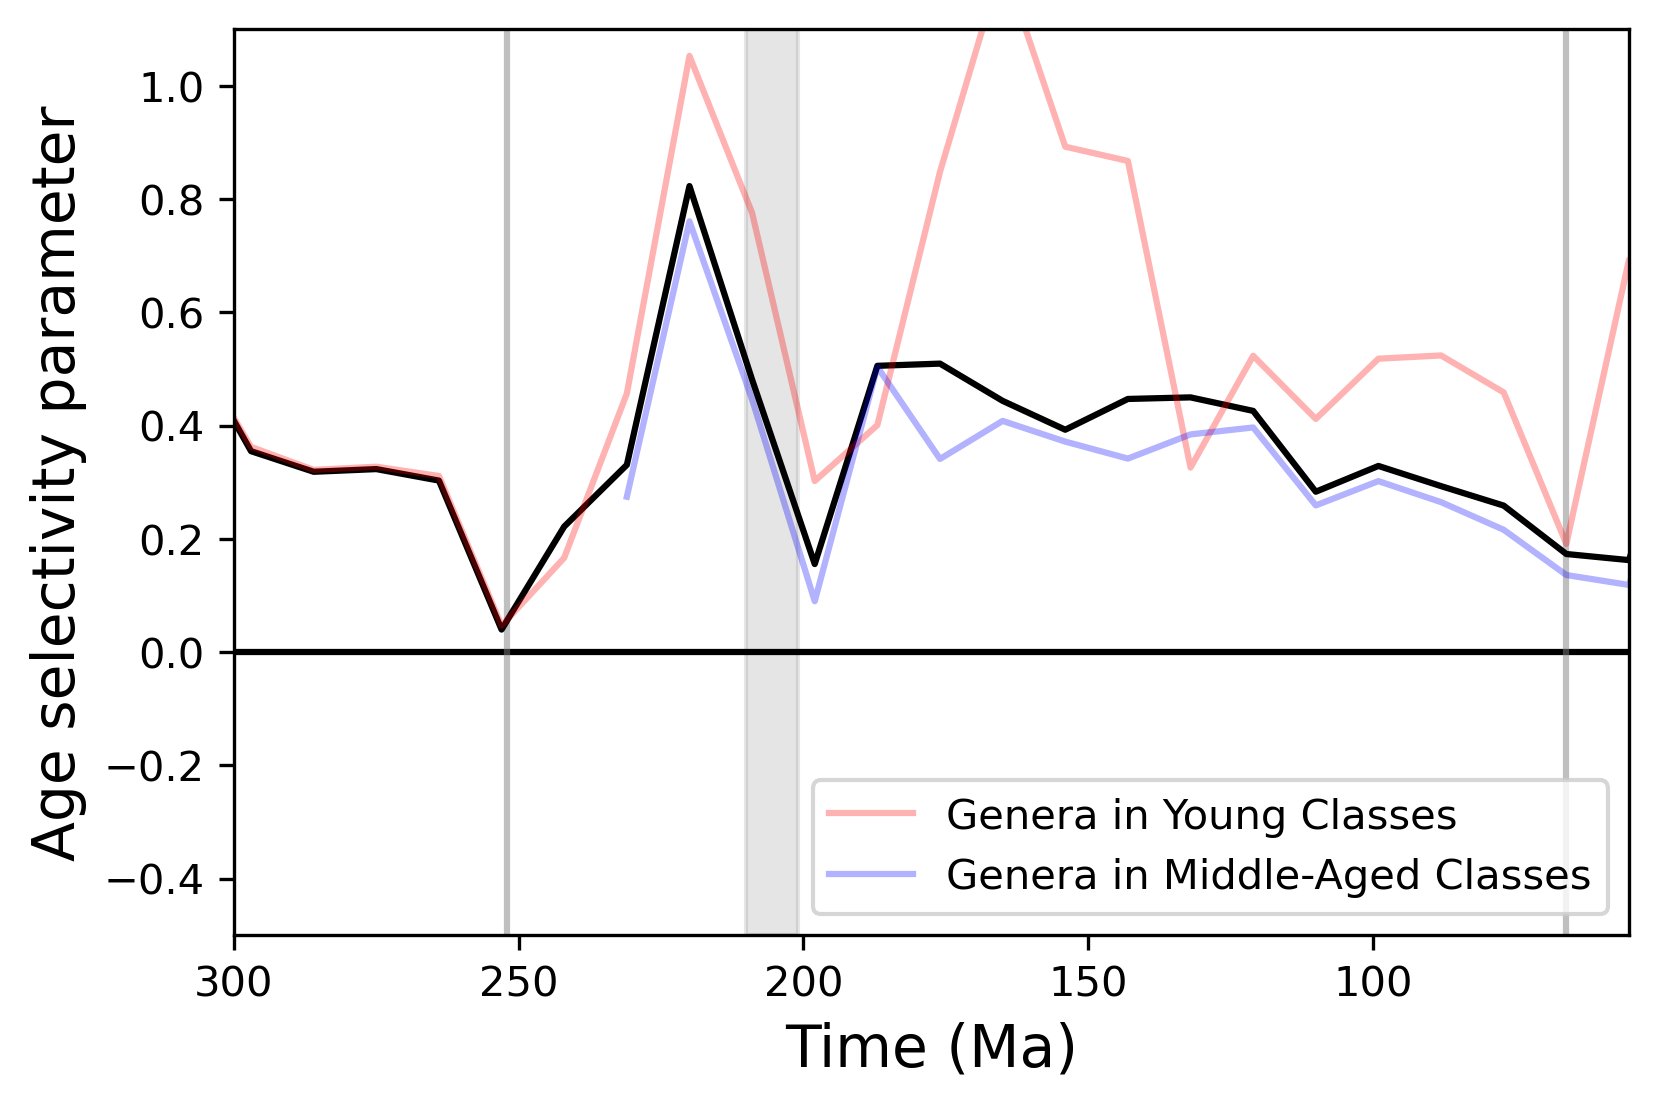

In [32]:
fig, ax = plt.subplots()
#fig.set_size_inches(20, 10)
bins_to_time = [(t_0 - (bin_size_hierarchical * x)) - (1 * bin_size_hierarchical) for x in range(bins_hierarchical)]
#ax.scatter([(start + end) / 2 for start, end in LIPs], [-0.1] * len(LIPs), color="red")
ax.hlines(0, 0, t_0, color="black")
ax.vlines([252, 66], -5, 5, alpha=0.5, color="gray")
ax.axvspan(375, 360, alpha=0.2, color='gray')
ax.axvspan(450, 440, alpha=0.2, color='gray')
ax.axvspan(201, 210, alpha=0.2, color='gray')
#ax.bar([t_0 - (bin_size * x) - (0.5 * bin_size) for x in np.linspace(0, bins, num=high_res_bins)], [x if x>0 else 0 for x in extinctionRatesHighRes],
#        color="gray",width=1,bottom=0)

ax.plot(bins_to_time,[np.log(x) for x in logOddsH], color="black")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds], s=20, color="black")

ax.plot(bins_to_time[start_class_young:],[np.log(x) for x in logOdds_youngMega][start_class_young:], color="red", alpha=0.3, label="Genera in Young Classes")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_youngSuper], s=20, color="red")

ax.plot(bins_to_time[start_class_mid:],[np.log(x) for x in logOdds_midMega][start_class_mid:], color="blue", alpha=0.3, label="Genera in Middle-Aged Classes")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_midSuper], s=20, color="purple")

#ax.plot(bins_to_time,[np.log(x) for x in logOdds_oldMega], color="blue", alpha=0.3, label="Genera in Old Classes")
#ax.scatter(bins_to_time,[np.log(x) for x in logOdds_oldSuper], s=20, color="blue")

ax.legend(fontsize=10, loc='lower right')
plt.xlabel("Time (Ma)", fontsize=14)
plt.ylabel("Age selectivity parameter", fontsize=14)
plt.xlim(55,300)
plt.ylim(-0.5,1.1)
plt.gca().invert_xaxis()

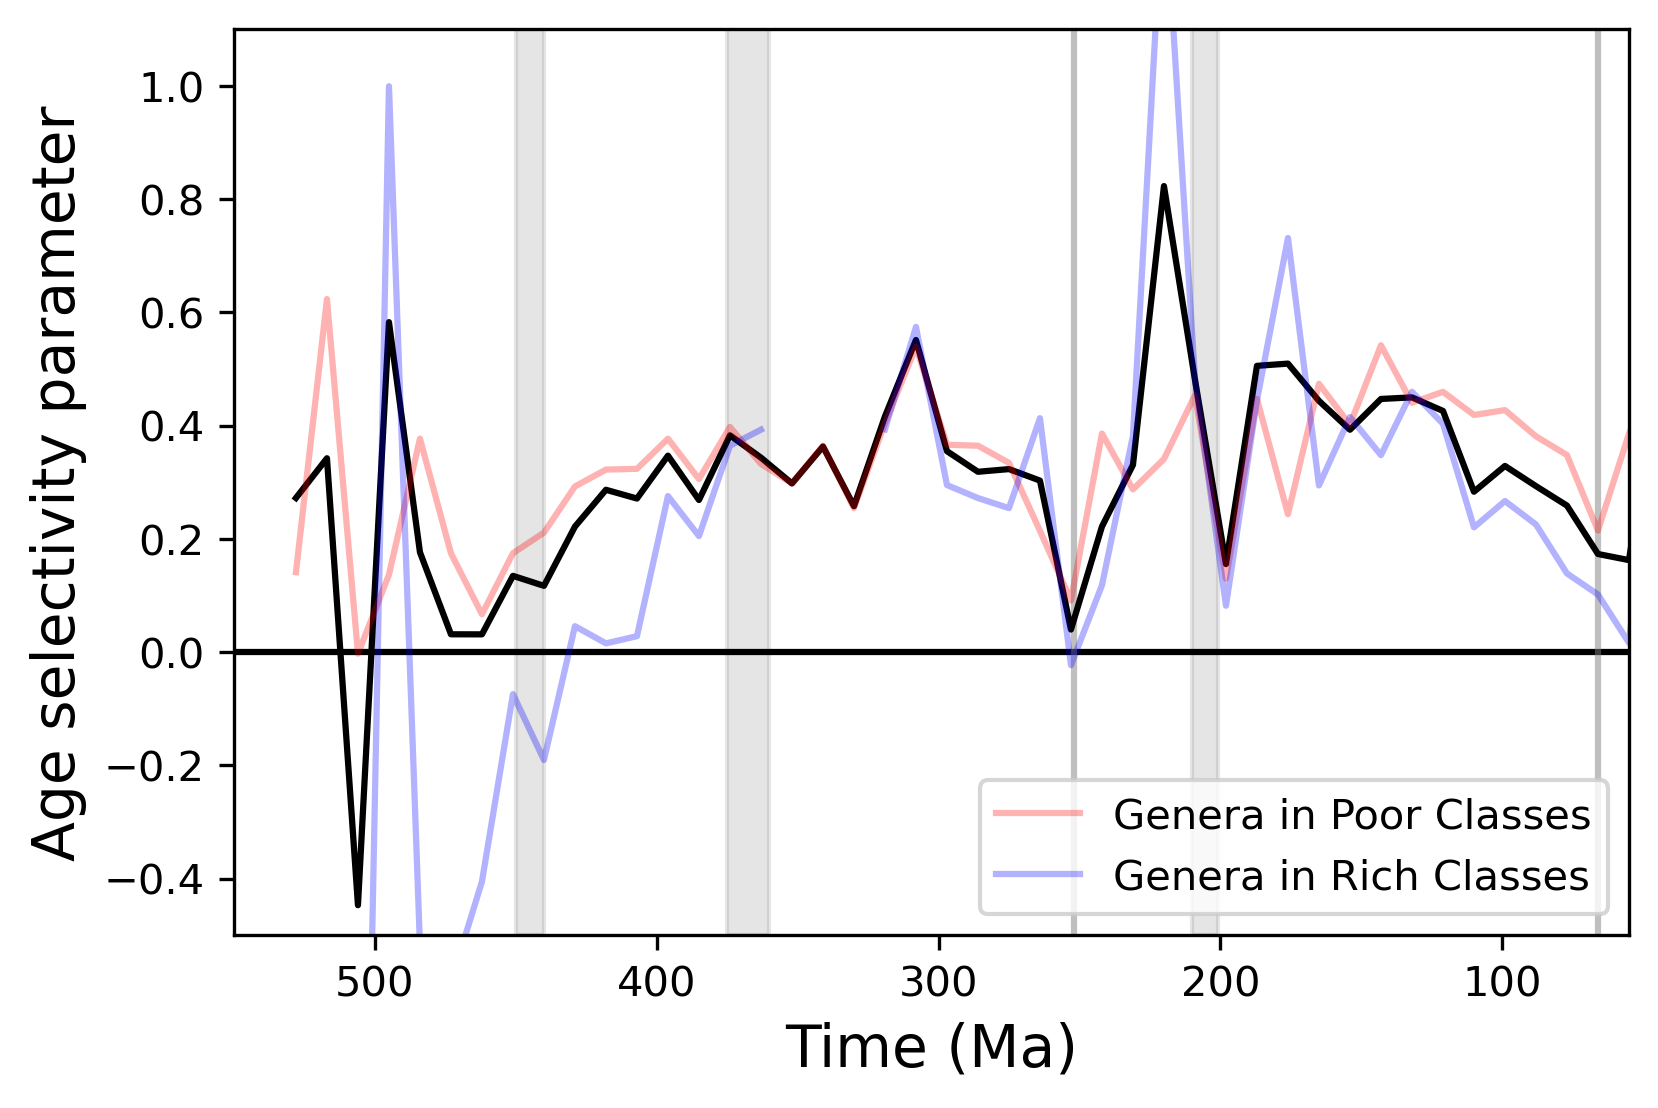

In [33]:
fig, ax = plt.subplots()
bins_to_time = [(t_0 - (bin_size_hierarchical * x)) - (1 * bin_size_hierarchical) for x in range(bins_hierarchical)]
ax.hlines(0, 0, t_0, color="black")
ax.vlines([252, 66], -5, 5, alpha=0.5, color="gray")
ax.axvspan(375, 360, alpha=0.2, color='gray')
ax.axvspan(450, 440, alpha=0.2, color='gray')
ax.axvspan(201, 210, alpha=0.2, color='gray')

ax.plot(bins_to_time,[np.log(x) for x in logOddsH], color="black")

ax.plot(bins_to_time,[np.log(x) for x in logOdds_poor], color="red", alpha=0.3, label="Genera in Poor Classes")

ax.plot(bins_to_time,[np.log(x) for x in logOdds_rich], color="blue", alpha=0.3, label="Genera in Rich Classes")

ax.legend(fontsize=10, loc='lower right')
plt.xlabel("Time (Ma)", fontsize=14)
plt.ylabel("Age selectivity parameter", fontsize=14)
plt.xlim(55,t_0)
plt.ylim(-0.5,1.1)
plt.gca().invert_xaxis()

36832 young subclades 80214 mid subclades and 0 old subclades
checked: 127691 assigned: 117046 ratio: 0.916634688427532
36832 young subclades 80214 mid subclades and 0 old subclades
checked: 127691 assigned: 117046 ratio: 0.916634688427532


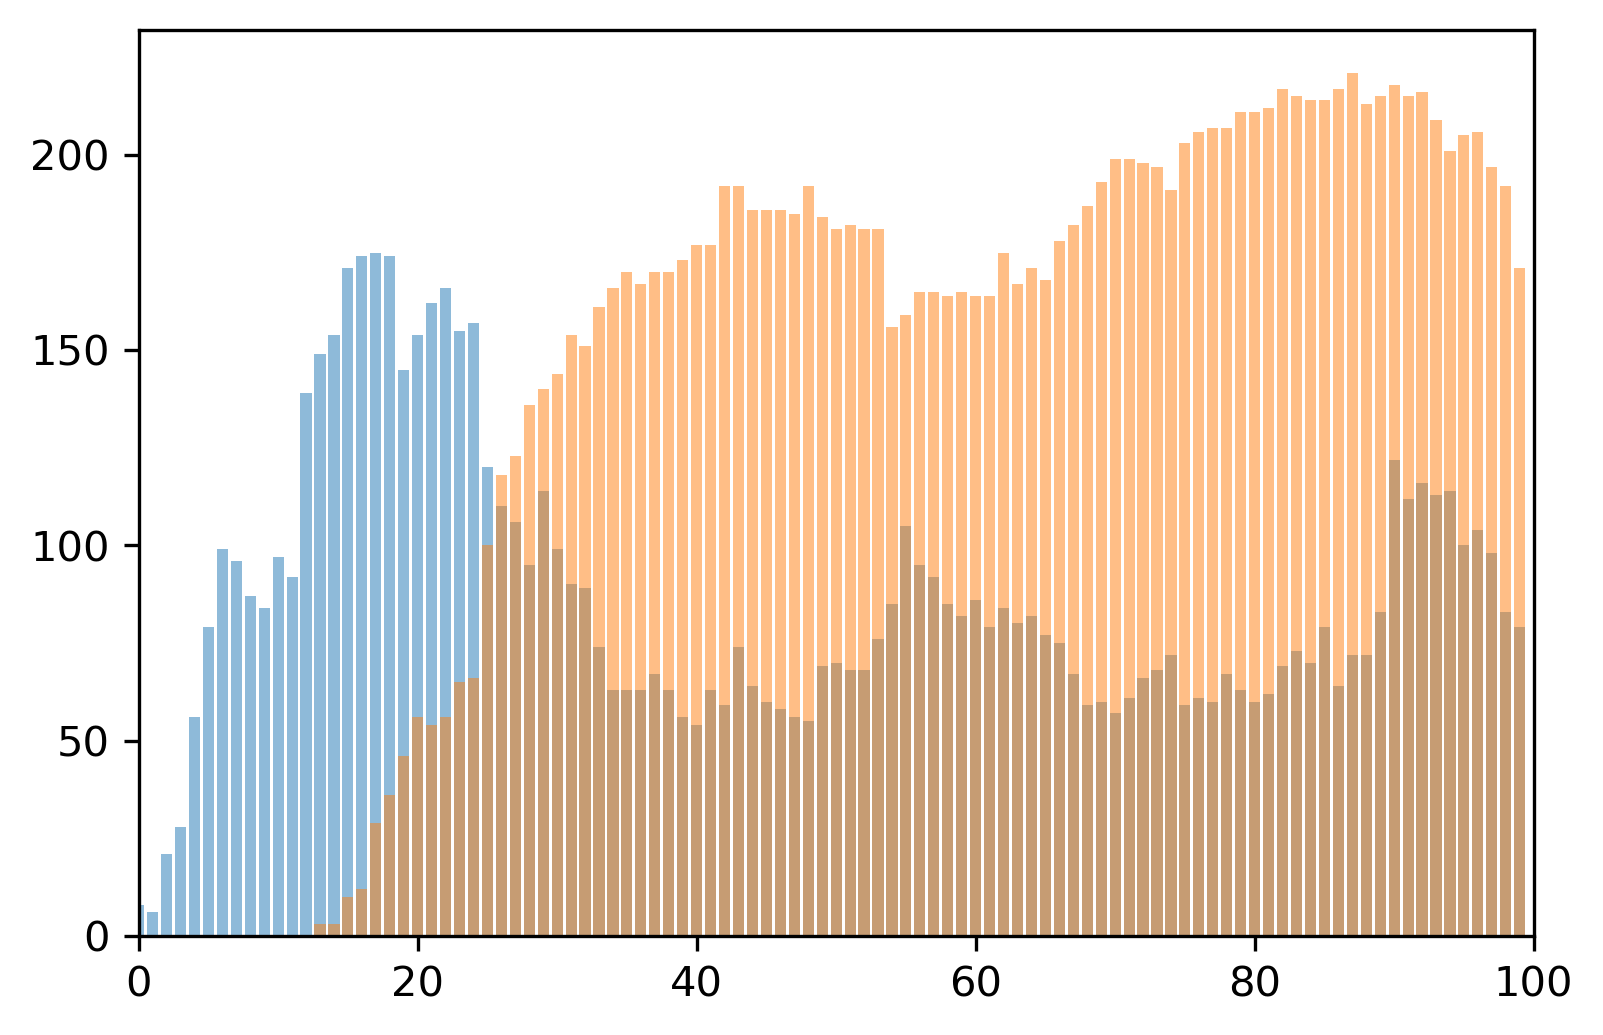

In [70]:
# Unused blocks to be deleted eventually:
#Splitting by Order
young_cutoff_ord = 13
mid_cutoff_ord = 1000

durationMatrixMetazoaSuperduper, superduper_labels = getDurationMatrix(superdupercladeDictMetazoa, n_bins=bins_hierarchical, t_0=t_0, 
                                                             max_duration=700, min_occurrences=min_occurrences_hierarchical,
                                                             return_labels=True)

survivalMatricesSuperduper = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                               taxDict=taxDictOrder, supercladeDurationMatrix=durationMatrixMetazoaSuperduper, 
                                               taxon_labels=labelsH, super_labels=superduper_labels, 
                                               young_cutoff=young_cutoff_ord, mid_cutoff=mid_cutoff_ord)

_, countsOrd = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                               taxDict=taxDictOrder, supercladeDurationMatrix=durationMatrixMetazoaSuperduper, 
                                               taxon_labels=labelsH, super_labels=superduper_labels, 
                                               young_cutoff=young_cutoff_ord, mid_cutoff=mid_cutoff_ord, proportions=False)

age_counts_order_young = np.sum(np.logical_and(durationMatrixMetazoaSuperduper>0, durationMatrixMetazoaSuperduper<=young_cutoff_ord), axis=0)
#print(age_counts_order_young)
age_counts_order_mid = np.sum(np.logical_and(durationMatrixMetazoaSuperduper>young_cutoff_ord, durationMatrixMetazoaSuperduper<mid_cutoff_ord), axis=0)
plt.bar(range(bins_hierarchical), age_counts_order_young, alpha=0.5)
plt.bar(range(bins_hierarchical), age_counts_order_mid, alpha=0.5)
plt.xlim(0,bins_hierarchical)

# Defined start of plotting to be the first point where n >= 50
start_order_young = np.max(np.where(age_counts_order_young < 50)) + 1
start_order_mid = np.max(np.where(age_counts_order_mid < 50)) + 1

#print(len(countsOrd))

32387 young subclades 92780 mid subclades and 0 old subclades
checked: 127691 assigned: 125167 ratio: 0.9802335325120799
32387 young subclades 92780 mid subclades and 0 old subclades
checked: 127691 assigned: 125167 ratio: 0.9802335325120799


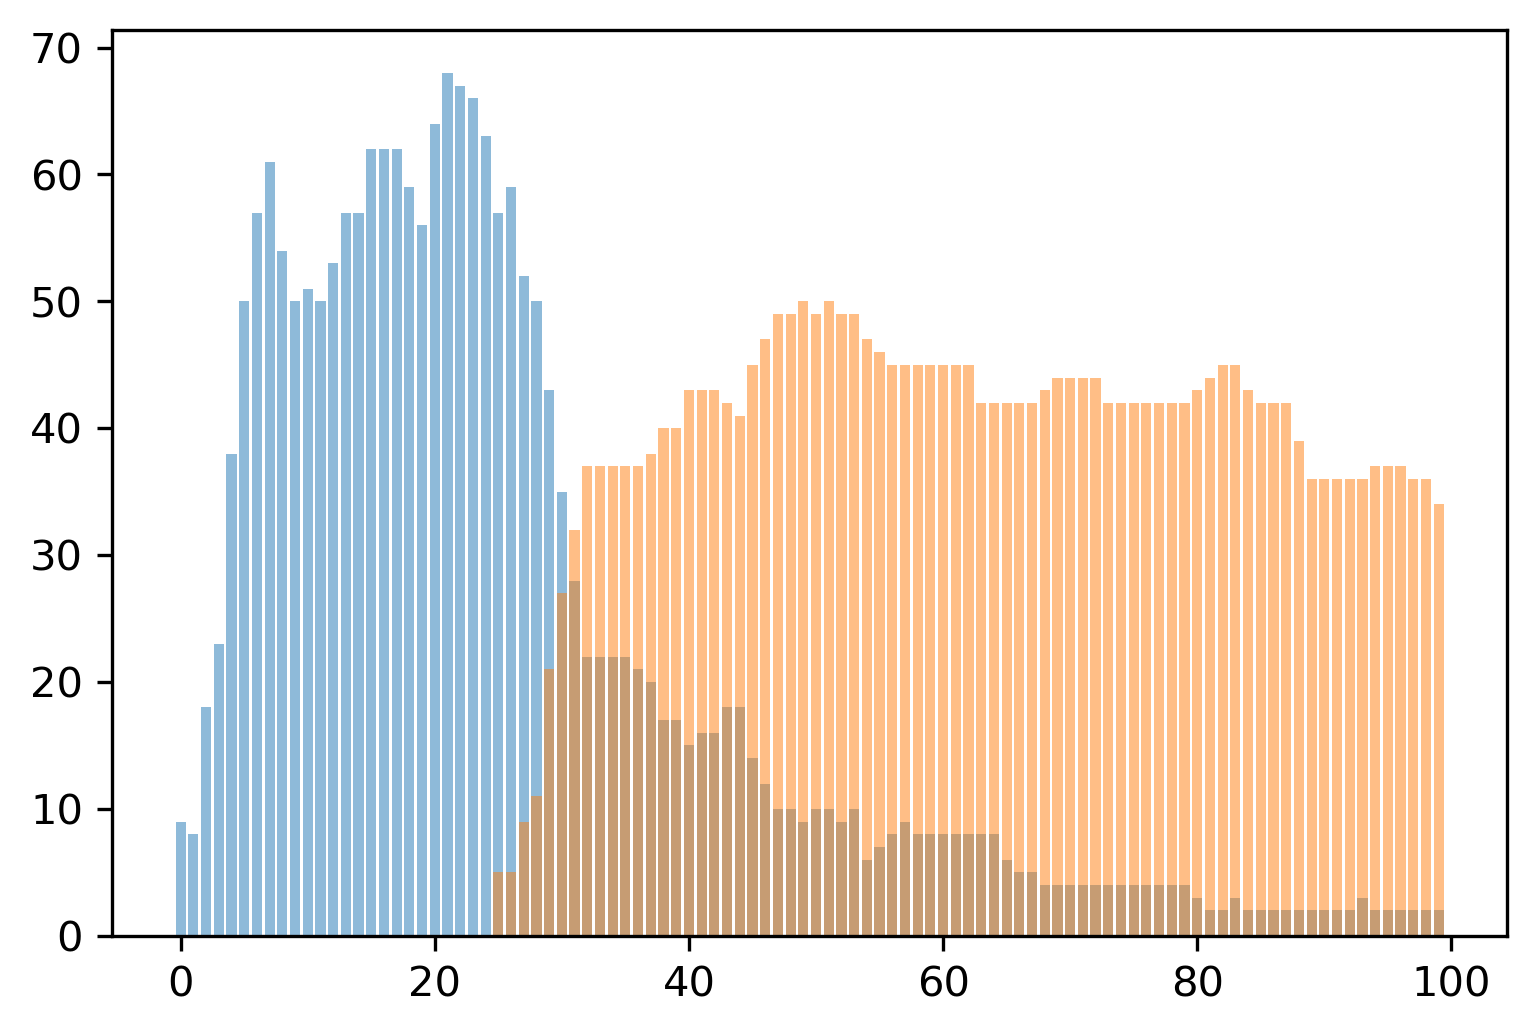

In [72]:
#Splitting by Class
young_cutoff_class = 25
mid_cutoff_class = 1000

durationMatrixMetazoaMega, mega_labels = getDurationMatrix(megacladeDictMetazoa, n_bins=bins_hierarchical, t_0=t_0, 
                                                             max_duration=700, min_occurrences=min_occurrences_hierarchical,
                                                             return_labels=True)

survivalMatricesMega = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                             taxDict=taxDictClass, supercladeDurationMatrix=durationMatrixMetazoaMega, 
                                             taxon_labels=labelsH, super_labels=mega_labels, 
                                             young_cutoff=young_cutoff_class, mid_cutoff=mid_cutoff_class)

_, countsClass = getSurvivalMatrix(durationMatrixMetazoaHierarchical, max_tail=tail_length, min_per_bin=min_per_bin, 
                                     taxDict=taxDictClass, supercladeDurationMatrix=durationMatrixMetazoaMega, 
                                     taxon_labels=labelsH, super_labels=mega_labels, 
                                     young_cutoff=young_cutoff_class, mid_cutoff=mid_cutoff_class, 
                                     proportions=False)


age_counts_class_young = np.sum(np.logical_and(durationMatrixMetazoaMega>0, durationMatrixMetazoaMega<=young_cutoff_class), axis=0)
age_counts_class_mid = np.sum(np.logical_and(durationMatrixMetazoaMega>young_cutoff_class, durationMatrixMetazoaMega<=mid_cutoff_class), axis=0)
plt.bar(range(bins_hierarchical), age_counts_class_young, alpha=0.5)
plt.bar(range(bins_hierarchical), age_counts_class_mid, alpha=0.5)

start_class_young = 0
start_class_mid = np.max(np.where(age_counts_class_mid < 20)) + 1